<a href="https://www.kaggle.com/code/rucheiitr/heart-disease-prediction?scriptVersionId=171403564" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')

In [4]:
df.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 319795
Number of Columns: 18


In [6]:
#check for missing values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

There are no missing values

In [7]:
#Check for unique values in each column
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

Most of the variables are cateogrical with 2 different values.

In [8]:
#Check for variable types
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [9]:
#Univariate Analysis - Categorical variables
list_cateog=df.select_dtypes(include=['object']).columns.tolist()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

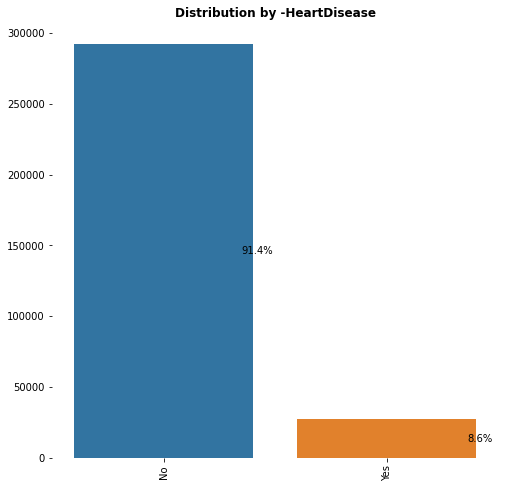

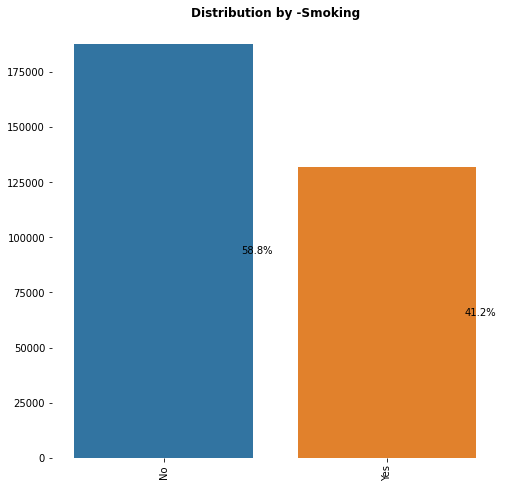

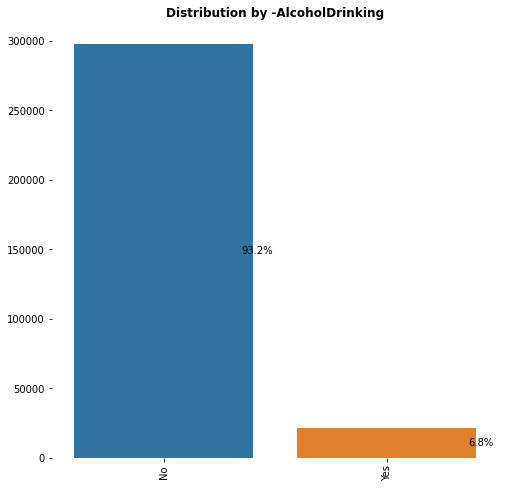

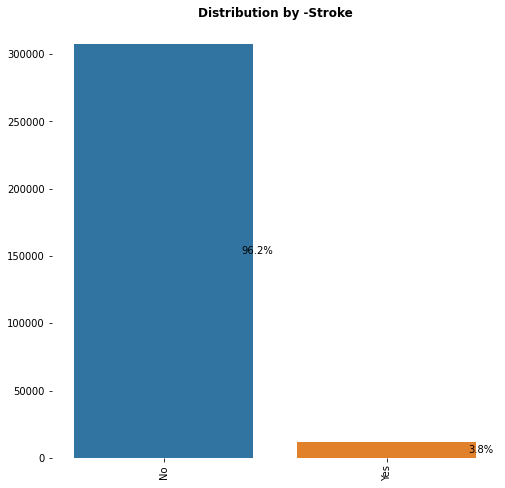

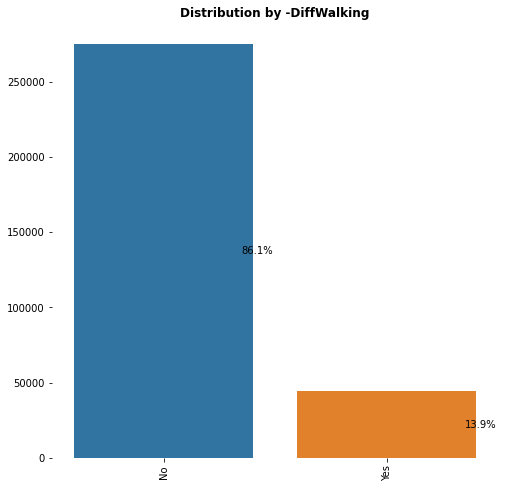

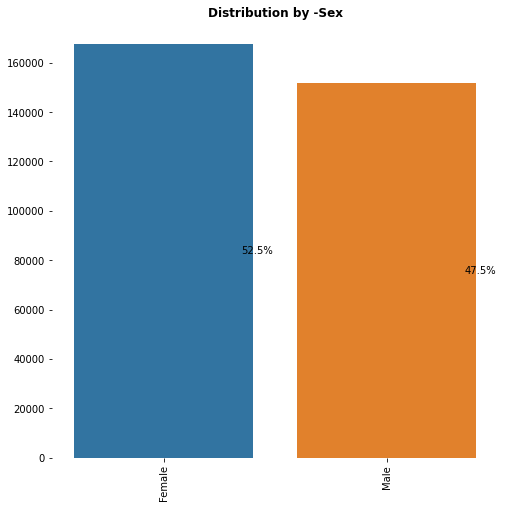

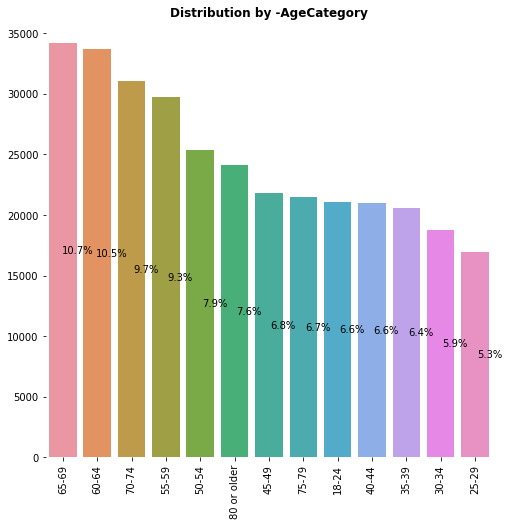

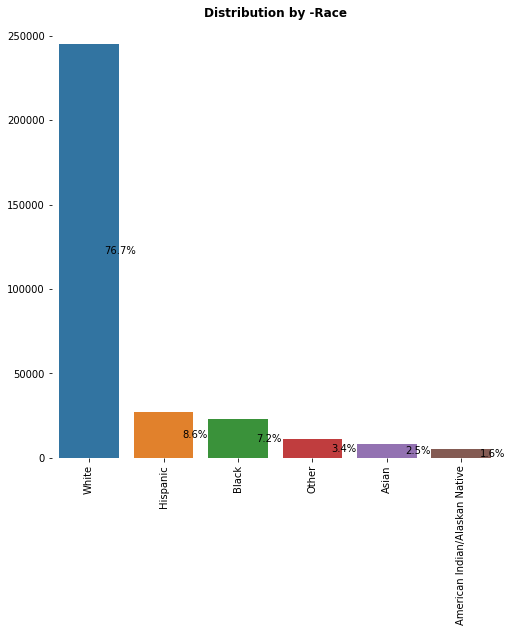

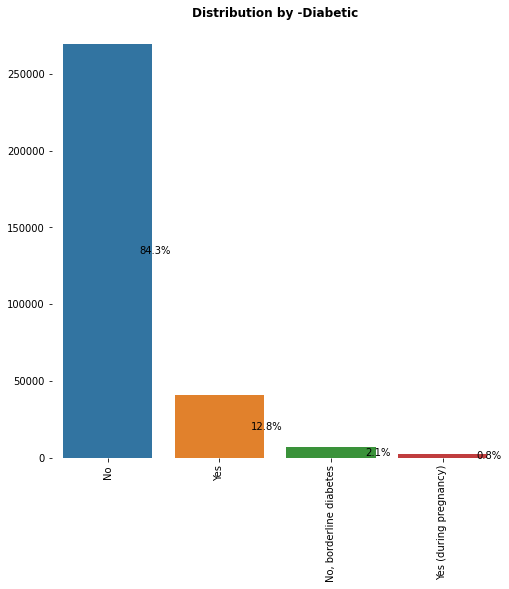

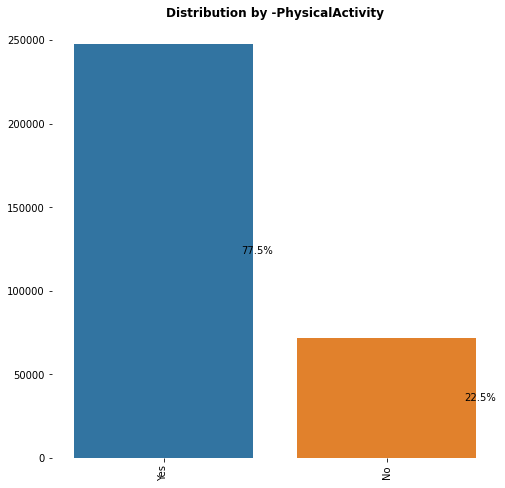

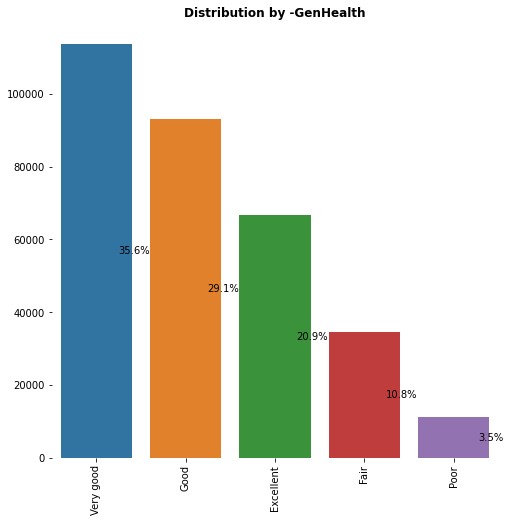

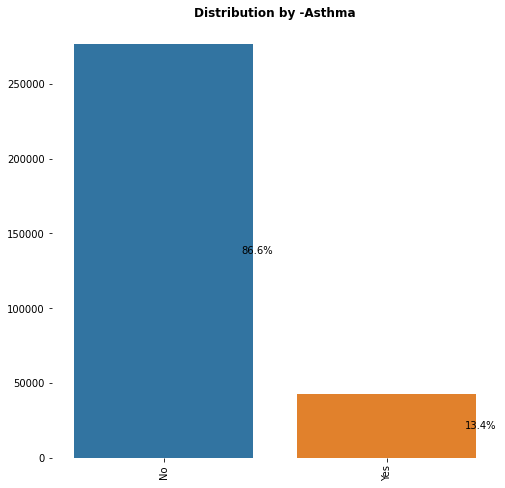

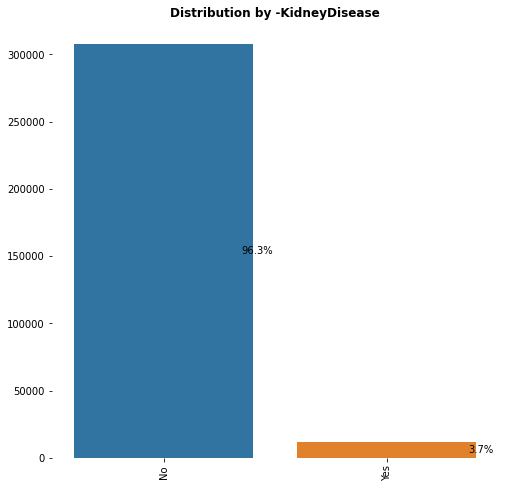

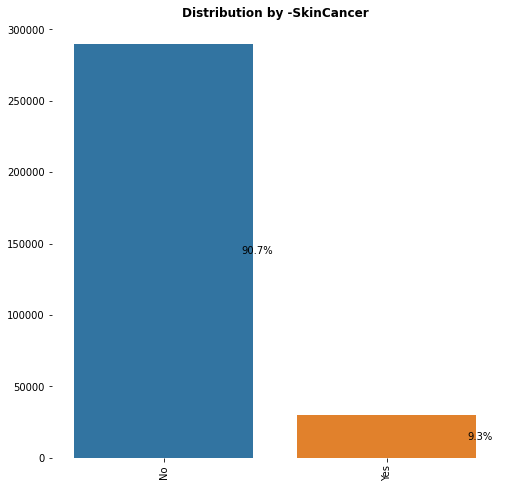

In [10]:
#Count plot to do the univariate analysis for the Categorical Data
for i in range(len(list_cateog)):
    fig,ax=plt.subplots(1,1,figsize=(8,8))
    var=list_cateog[i]
    sns.countplot(var, data=df,order=df[var].value_counts().index)
    plt.ylabel('')
    plt.xlabel('')
    plt.yticks(size=10)
    plt.xticks(size=10, rotation='vertical')
    title="Distribution by -" + var
    plt.title(title,size=12,weight='bold')
    total = len(df[var])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y), va='center', ha='center')
    plt.box(False)
plt.show()    

**Findings from the Univariate Analysis****
#1. Target Variable "Heart Diseas" is highly imbalanced
#2. Most of the variables have an imbalanced distribution
#3. These are the variables with good/balanced distribution in the dataset- Smoking, Sex,GenHealth,AgeCateogry

In [11]:
def box_hist_plot(df,yvar,title,yll):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .55)})

    # assigning a graph to each ax
    sns.boxplot(df[yvar], ax=ax_box)
    sns.distplot(df[yvar],  kde=False, hist_kws=dict(ec="k"),ax=ax_hist)
    #sns.histplot(data=df, x="Sales", ax=ax_hist)
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')
    ax_box.set(title=title)
    ax_hist.set(ylabel=yll)
    plt.show()

In [12]:
list_non_categ=df.select_dtypes(include =['float64']).columns.tolist()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


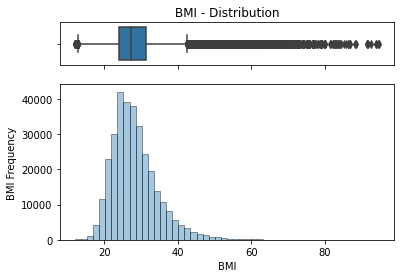

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


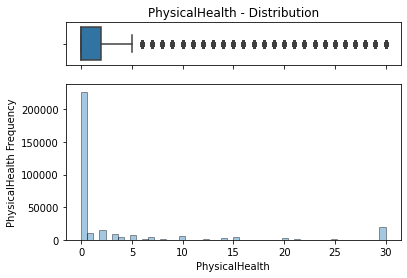

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


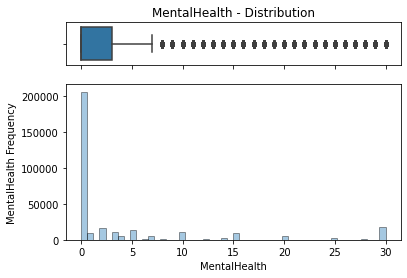

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


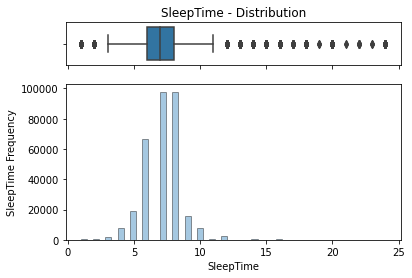

In [13]:
for i in range(len(list_non_categ)):
    title=list_non_categ[i] + " - Distribution" 
    yll=list_non_categ[i] + " Frequency"
    box_hist_plot(df,list_non_categ[i],title,yll)
    

> **Findings from the Non-Categorical Distribution**
1. Most of the BMI is around 20-40 with few outliers 
2. Physical Health/Mental Health is concentarted between 0 to 5 with few outliers
3. Sleep hours are between 6 to 9 hours generally


In [14]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No     60.375416
Yes    39.624584
Name: Smoking, dtype: float64
Distribution for People with Heart Disease: 
 Yes    58.586929
No     41.413071
Name: Smoking, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No     92.943075
Yes     7.056925
Name: AlcoholDrinking, dtype: float64
Distribution for People with Heart Disease: 
 No     95.831659
Yes     4.168341
Name: AlcoholDrinking, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No     97.373659
Yes     2.626341
Name: Stroke, dtype: float64
Distribution for People with Heart Disease: 
 No     83.965952
Yes    16.034048
Name: Stroke, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No     88.242335
Yes    11.757665
Name: DiffWalking, dtype: float64
Distribution for People with Heart Disease: 
 No     63.36536
Yes    36.63464
Name: DiffWalking, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 Female    53.542825
Male      46.457175
Name: Sex, dtype: float64
Distribution for People with Heart Disease: 
 Male      58.959559
Female    41.040441
Name: Sex, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 60-64          10.381914
65-69          10.276245
55-59           9.423026
70-74           8.965810
50-54           8.206975
45-49           7.197475
18-24           7.158832
40-44           7.017256
35-39           6.926291
80 or older     6.396236
30-34           6.335707
75-79           5.961590
25-29           5.752645
Name: AgeCategory, dtype: float64
Distribution for People with Heart Disease: 
 80 or older    19.906477
70-74          17.707230
65-69          14.981916
75-79          14.791948
60-64          12.154313
55-59           8.044423
50-54           5.052424
45-49           2.718007
40-44           1.775472
35-39           1.081358
30-34           0.825631
25-29           0.485880
18-24           0.474921
Name: AgeCategory, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 White                             76.158771
Hispanic                           8.892286
Black                              7.253216
Other                              3.434078
Asian                              2.668062
American Indian/Alaskan Native     1.593587
Name: Race, dtype: float64
Distribution for People with Heart Disease: 
 White                             82.223359
Black                              6.316443
Hispanic                           5.271618
Other                              3.236766
American Indian/Alaskan Native     1.980053
Asian                              0.971760
Name: Race, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No                         86.222651
Yes                        10.890084
No, borderline diabetes     2.049093
Yes (during pregnancy)      0.838172
Name: Diabetic, dtype: float64
Distribution for People with Heart Disease: 
 No                         64.001023
Yes                        32.722025
No, borderline diabetes     2.882402
Yes (during pregnancy)      0.394549
Name: Diabetic, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 Yes    78.813496
No     21.186504
Name: PhysicalActivity, dtype: float64
Distribution for People with Heart Disease: 
 Yes    63.891426
No     36.108574
Name: PhysicalActivity, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 Very good    37.096046
Good         28.578903
Excellent    22.345104
Fair          9.436021
Poor          2.543926
Name: GenHealth, dtype: float64
Distribution for People with Heart Disease: 
 Good         34.917620
Fair         25.879516
Very good    19.658057
Poor         14.064955
Excellent     5.479852
Name: GenHealth, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No     87.025942
Yes    12.974058
Name: Asthma, dtype: float64
Distribution for People with Heart Disease: 
 No     81.978592
Yes    18.021408
Name: Asthma, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No     97.153429
Yes     2.846571
Name: KidneyDisease, dtype: float64
Distribution for People with Heart Disease: 
 No     87.378073
Yes    12.621927
Name: KidneyDisease, dtype: float64


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Distribution for People with No Heart Disease: 
 No     91.505769
Yes     8.494231
Name: SkinCancer, dtype: float64
Distribution for People with Heart Disease: 
 No     81.80689
Yes    18.19311
Name: SkinCancer, dtype: float64


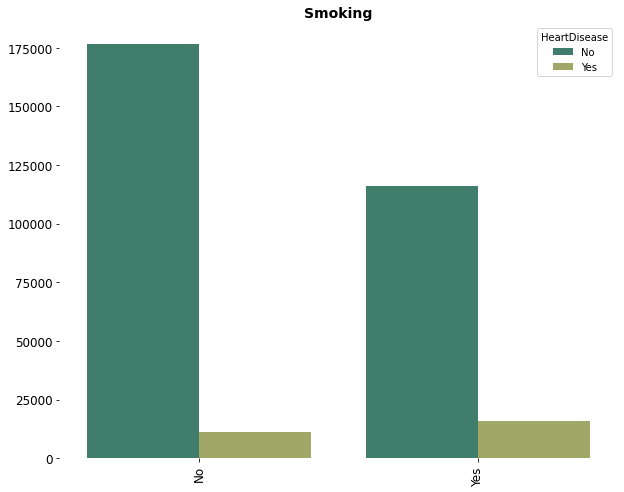

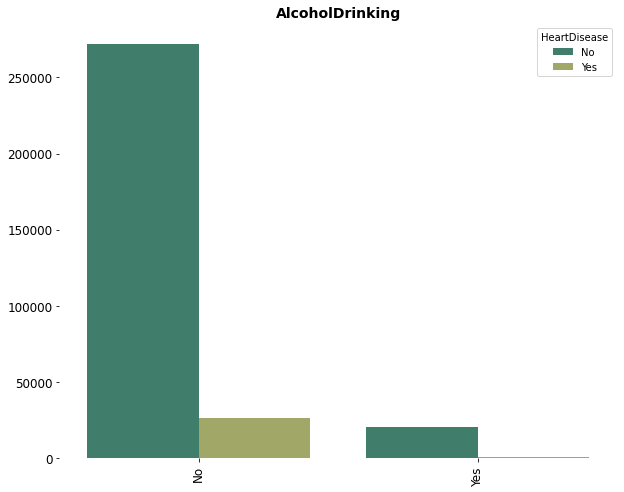

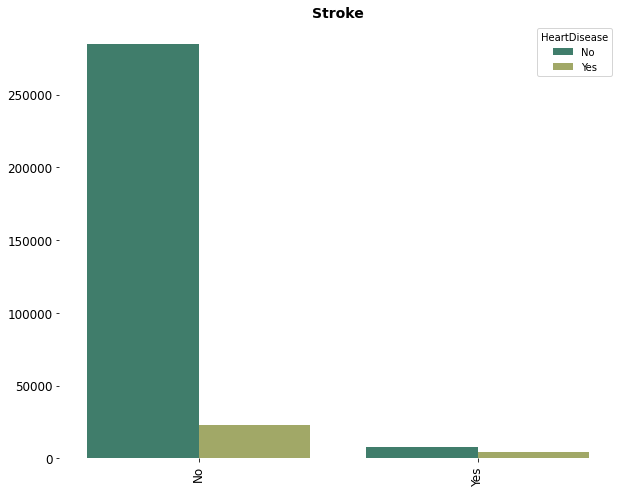

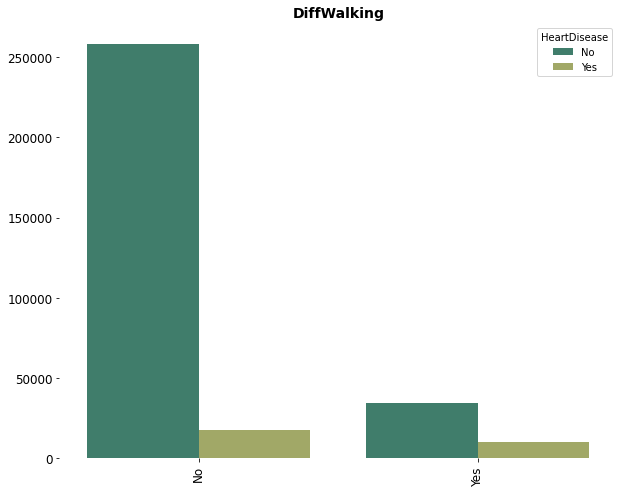

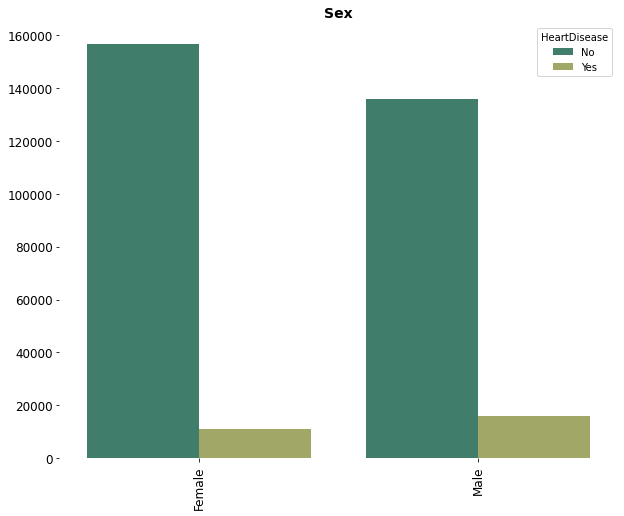

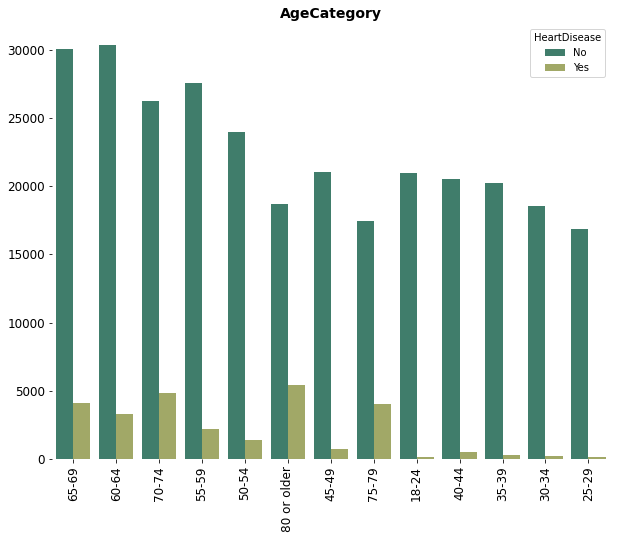

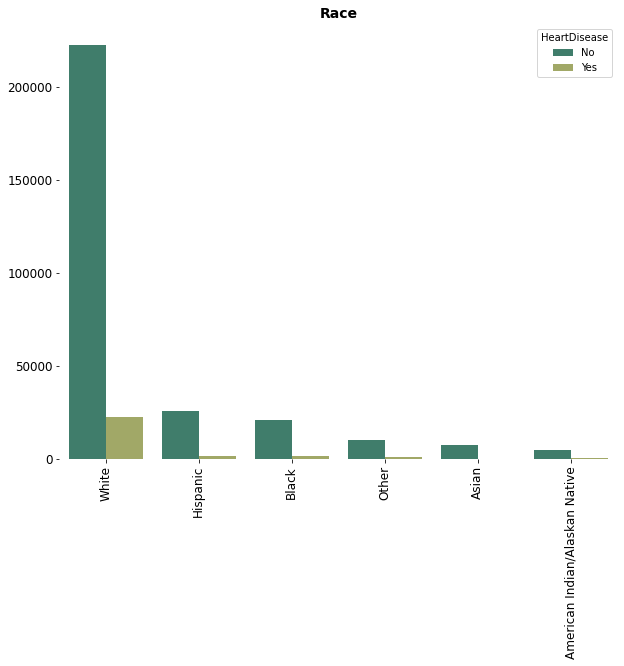

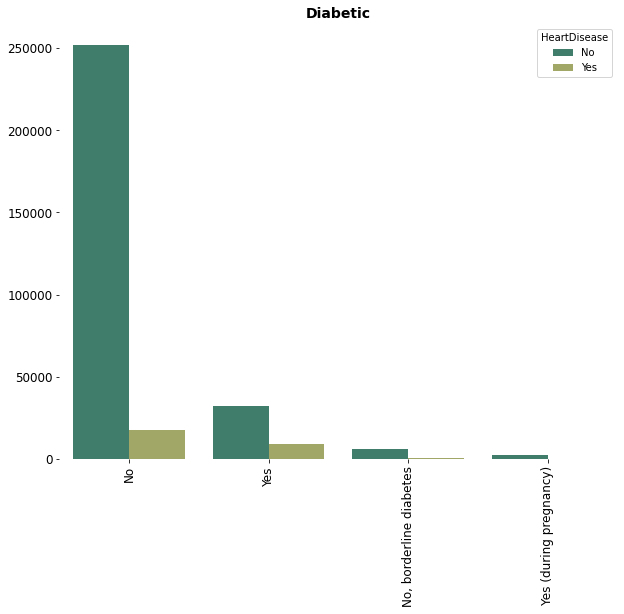

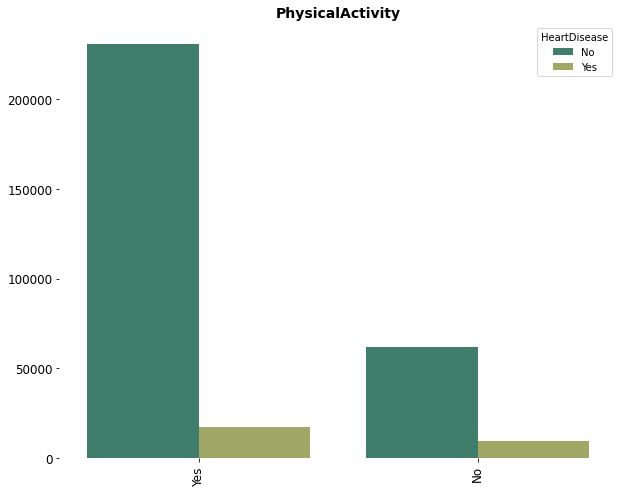

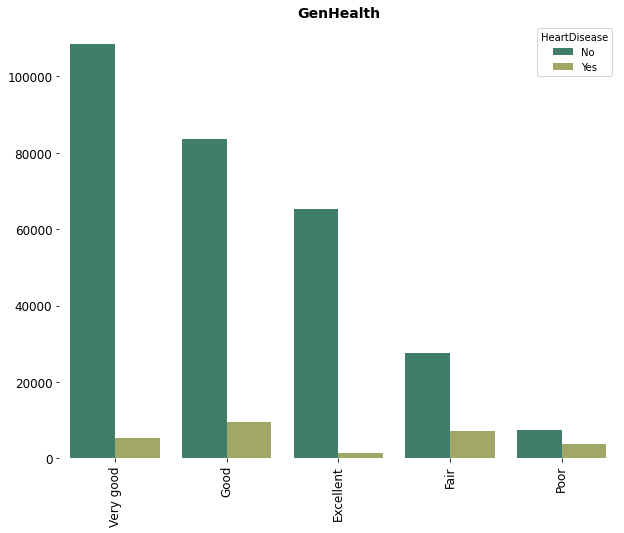

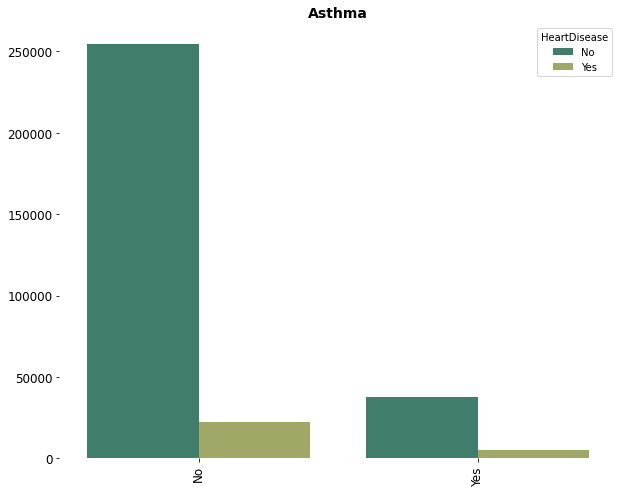

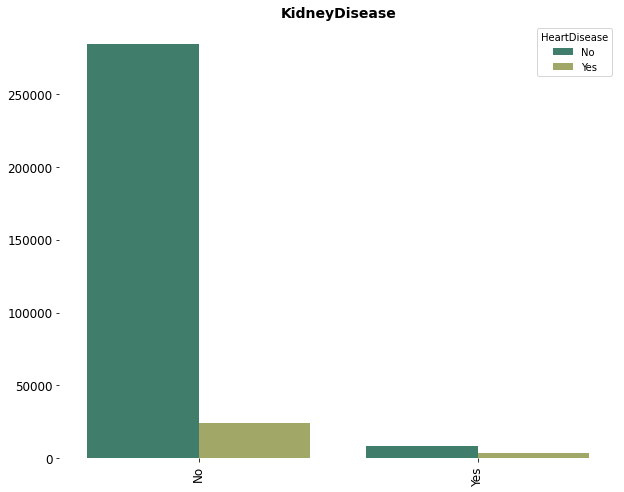

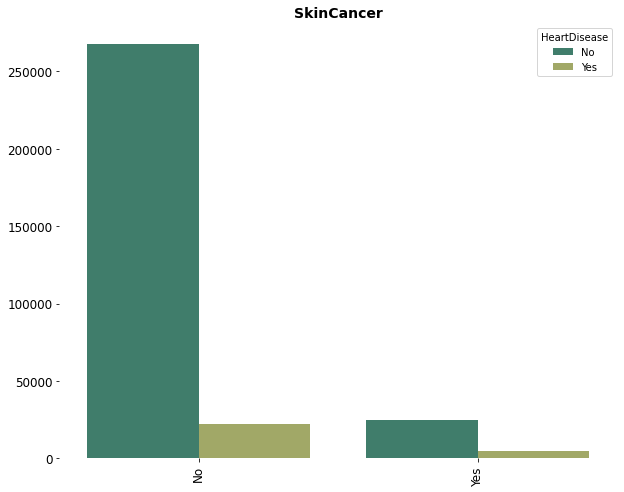

In [15]:
#Bivariate Analysis with respect to Target Variable - Heart Disease
for i in range(1,len(list_cateog)):
    fig,ax=plt.subplots(figsize=(10,8))
    var=list_cateog[i]
    ax=sns.countplot(var, data=df, order=df[var].value_counts().index,palette='gist_earth', hue=list_cateog[0])
    plt.ylabel('')
    plt.xlabel('')
    plt.yticks(size=12)
    plt.xticks(size=12, rotation='vertical')
    plt.title(var, size=14, weight='bold')
    total = len(df[var])
    print("Distribution for People with No Heart Disease: \n",100*df[df[list_cateog[0]] == 'No'][var].value_counts()/df[df[list_cateog[0]] == 'No'][var].count())
    print("Distribution for People with Heart Disease: \n",100*df[df[list_cateog[0]] == 'Yes'][var].value_counts()/df[df[list_cateog[0]] == 'Yes'][var].count())
    plt.box(False)
plt.show()


Findimgs from the Bivariate Analysis - Target Variable "Heart Disease" with other Categorical Variables
1. Smoking does not seem to have significant impact on people with heart disease. This is quite interesting
2. Alcohol drinking seems to affect people with heart disease less 
3. History of Stroke is more prevalant on people with heart disease
4. Difficulty in Walking is also correlated with heart disease
5. In terms of Sex, Men tends to have slightly more heart disease than women
6. For Age, 60 and above increase the chances of heart diseas
7. Race does not seem to play much role in heart disease
8. Having Diabetes increase the chances of heart disease
9. People with heart disease tends to do lower physical activity
10. People with heart disease have less General Health distribution
11. Asthma has an impact on heart disease
12. Kidney Disease has an impact on heart disease
13. Skin Cancer has an impact on heart disease

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


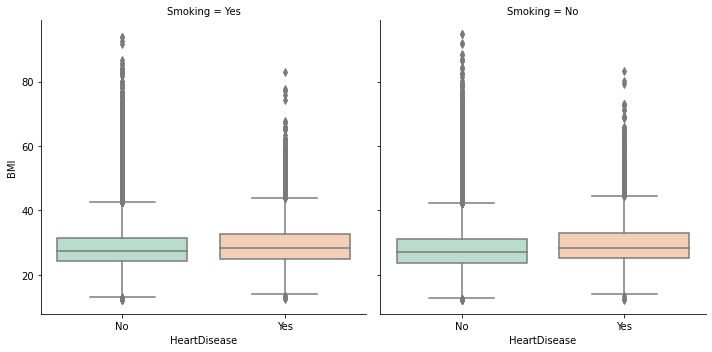

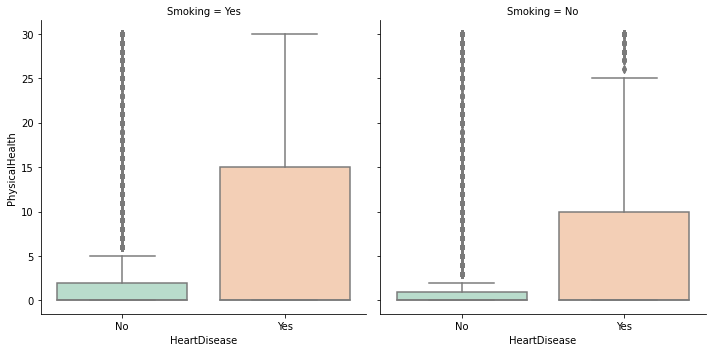

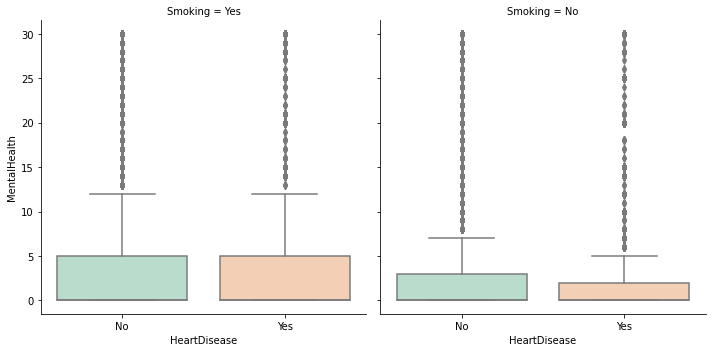

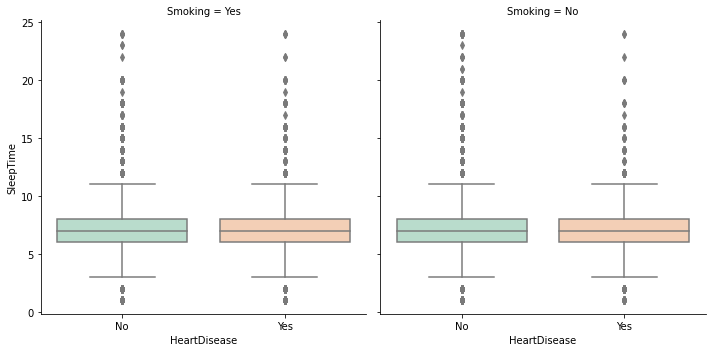

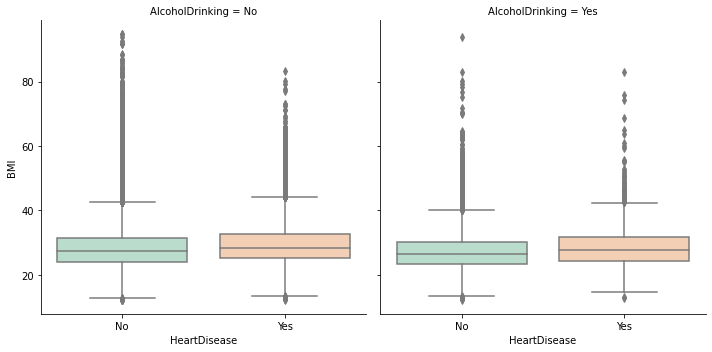

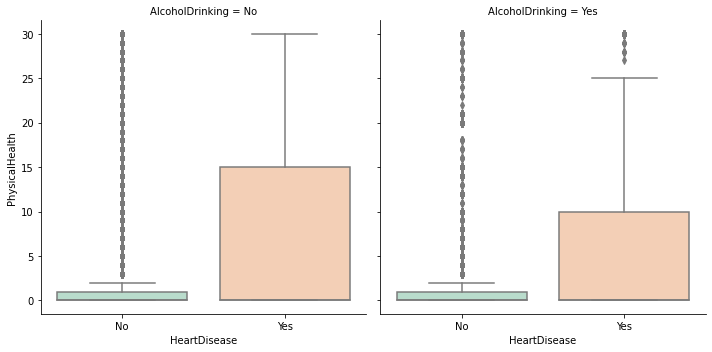

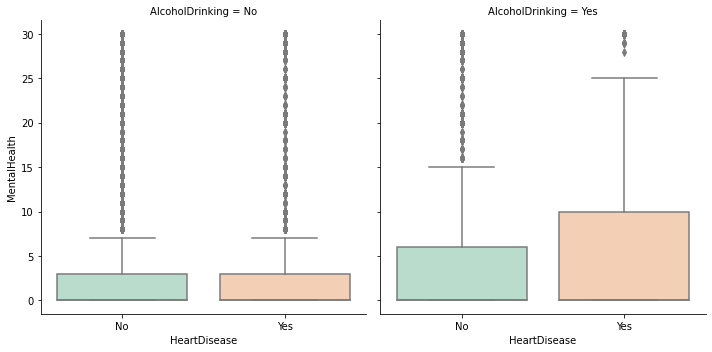

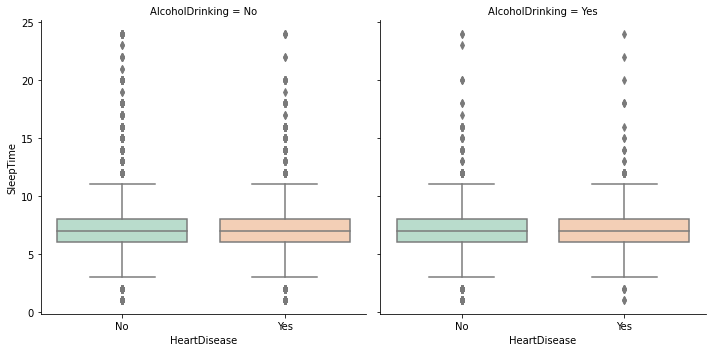

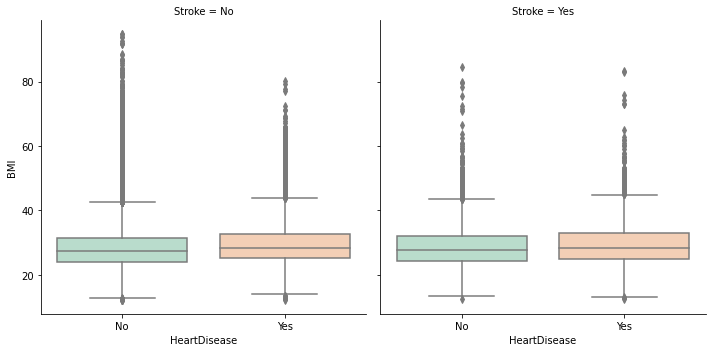

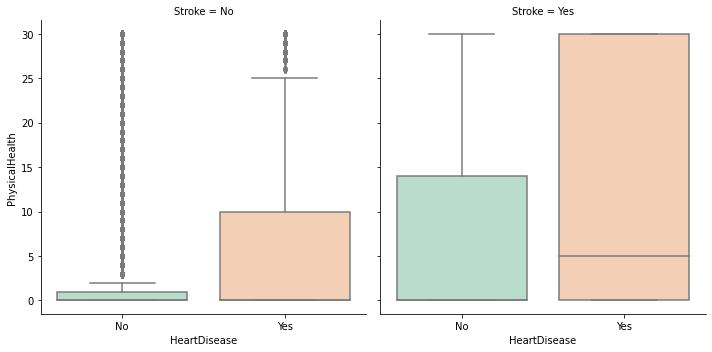

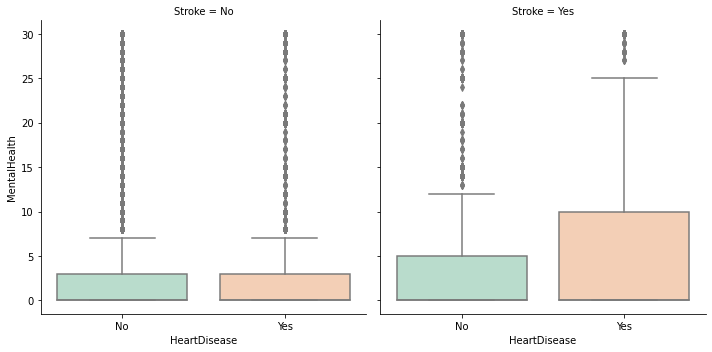

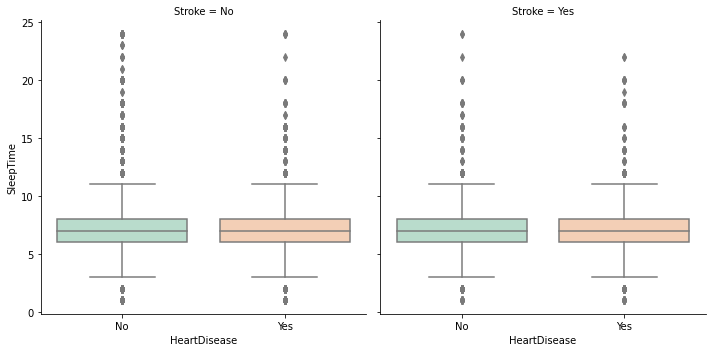

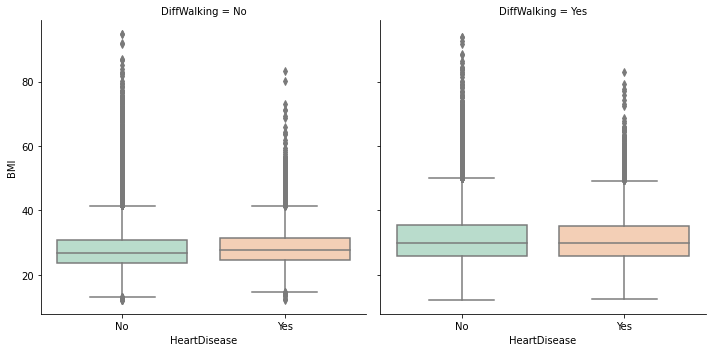

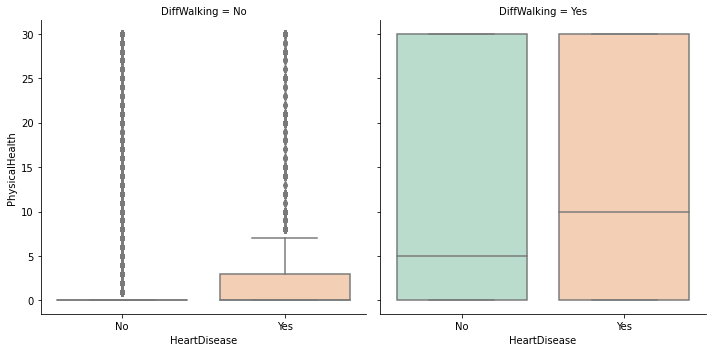

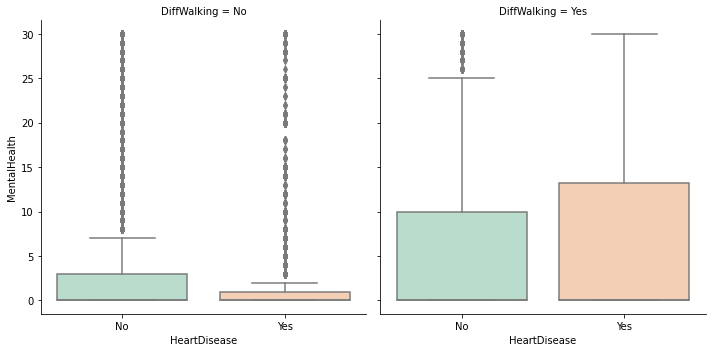

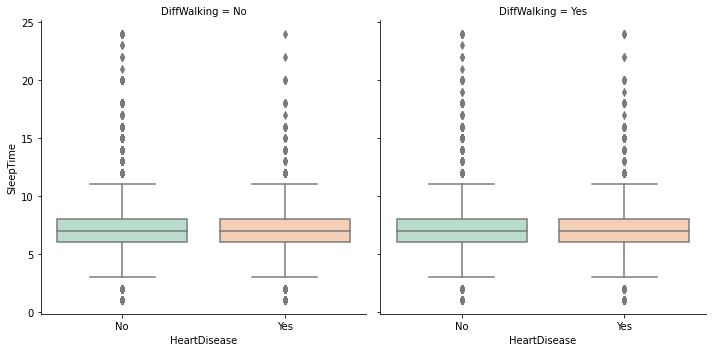

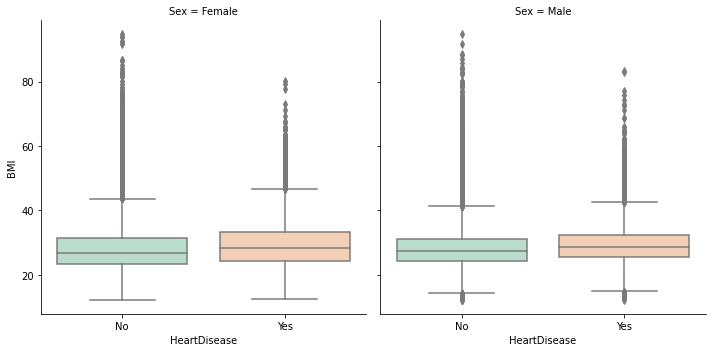

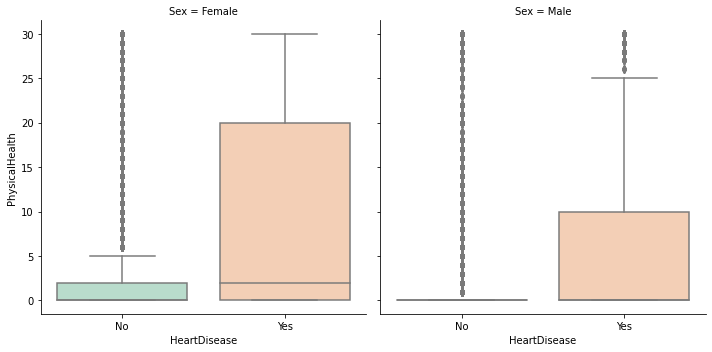

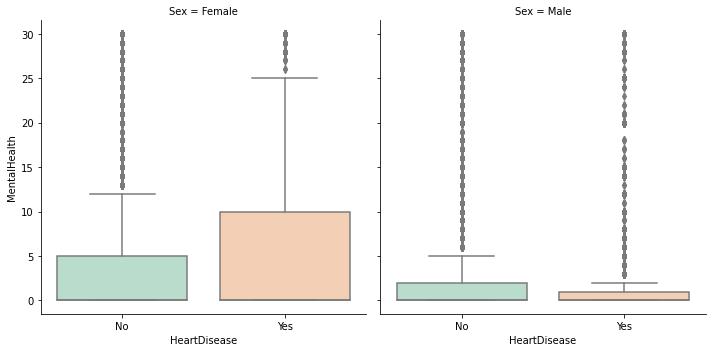

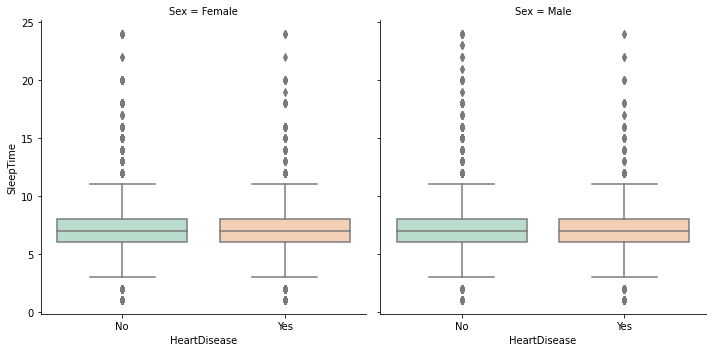

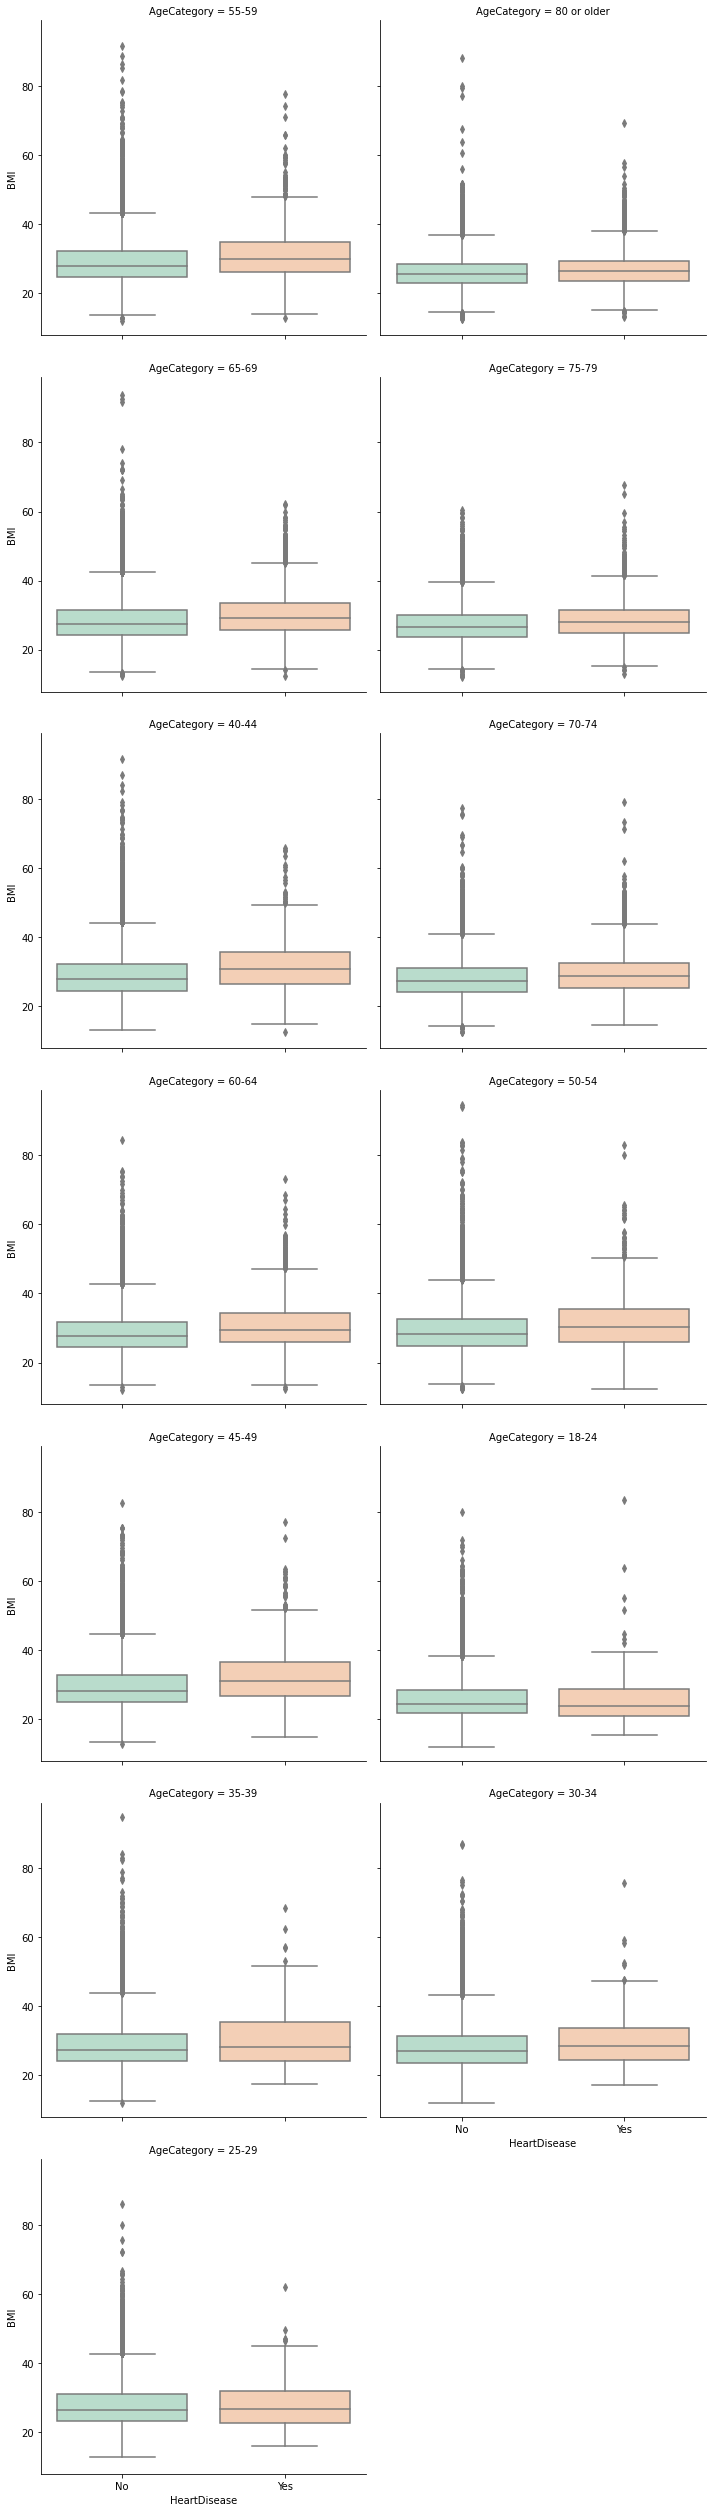

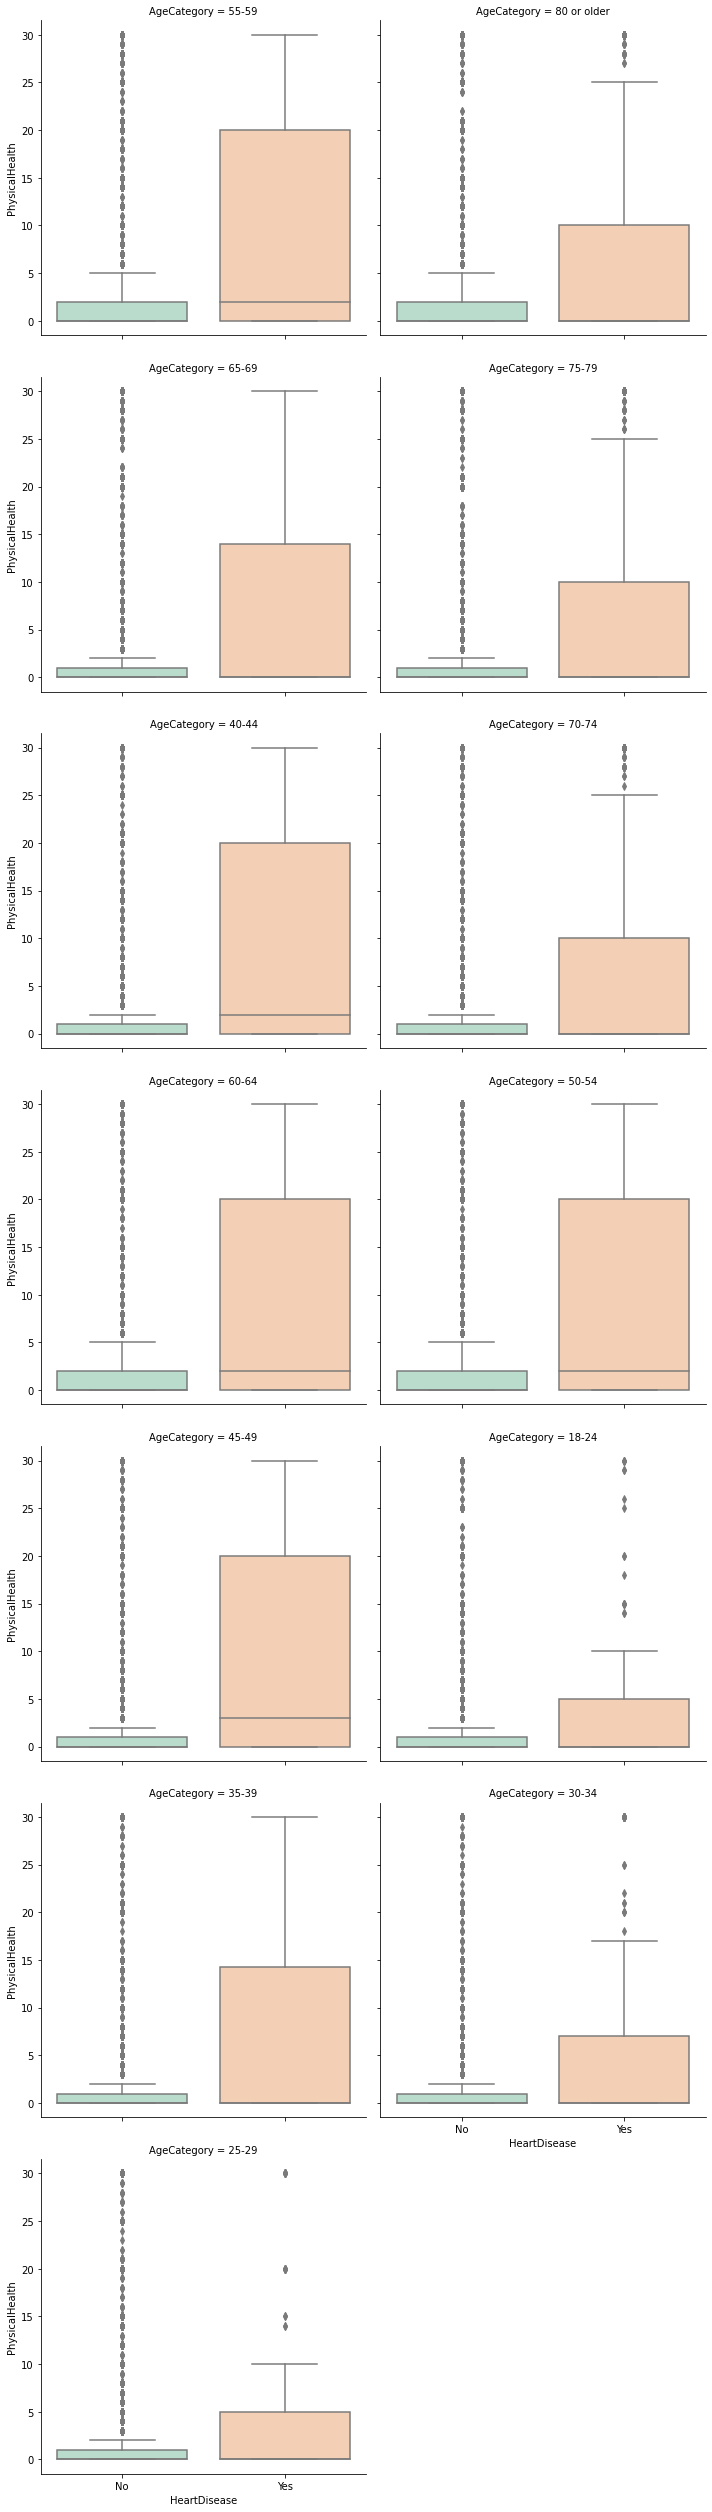

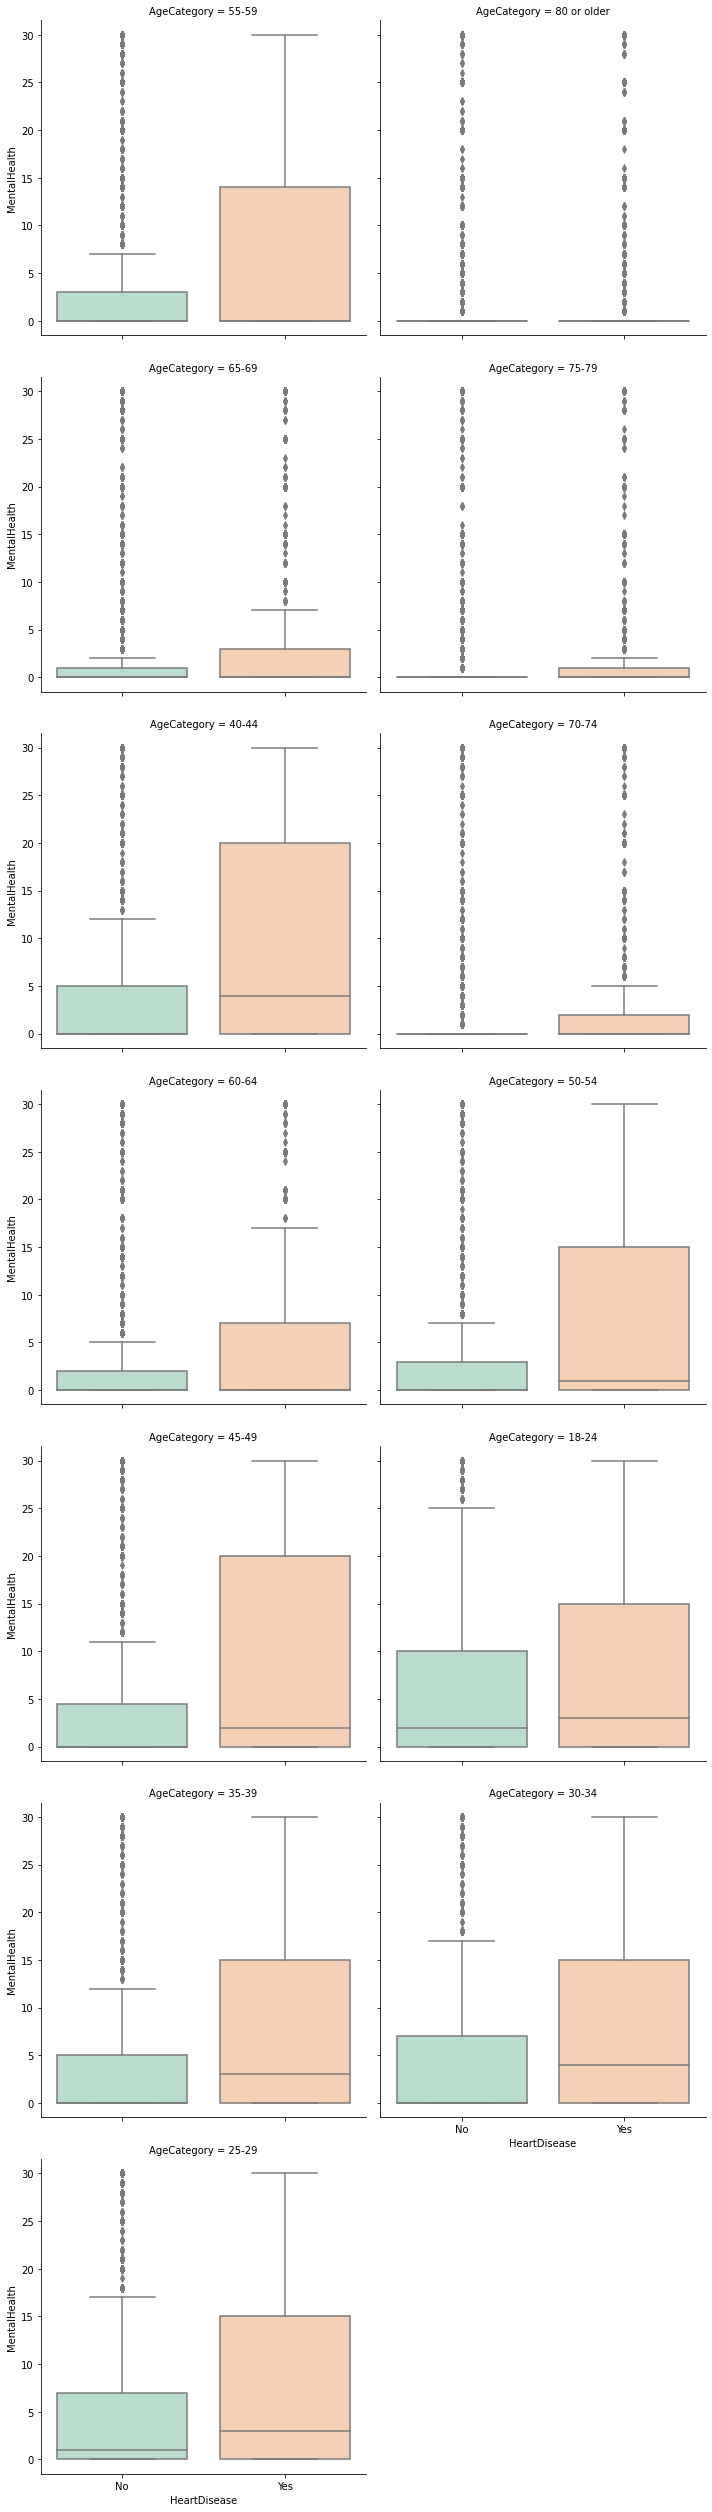

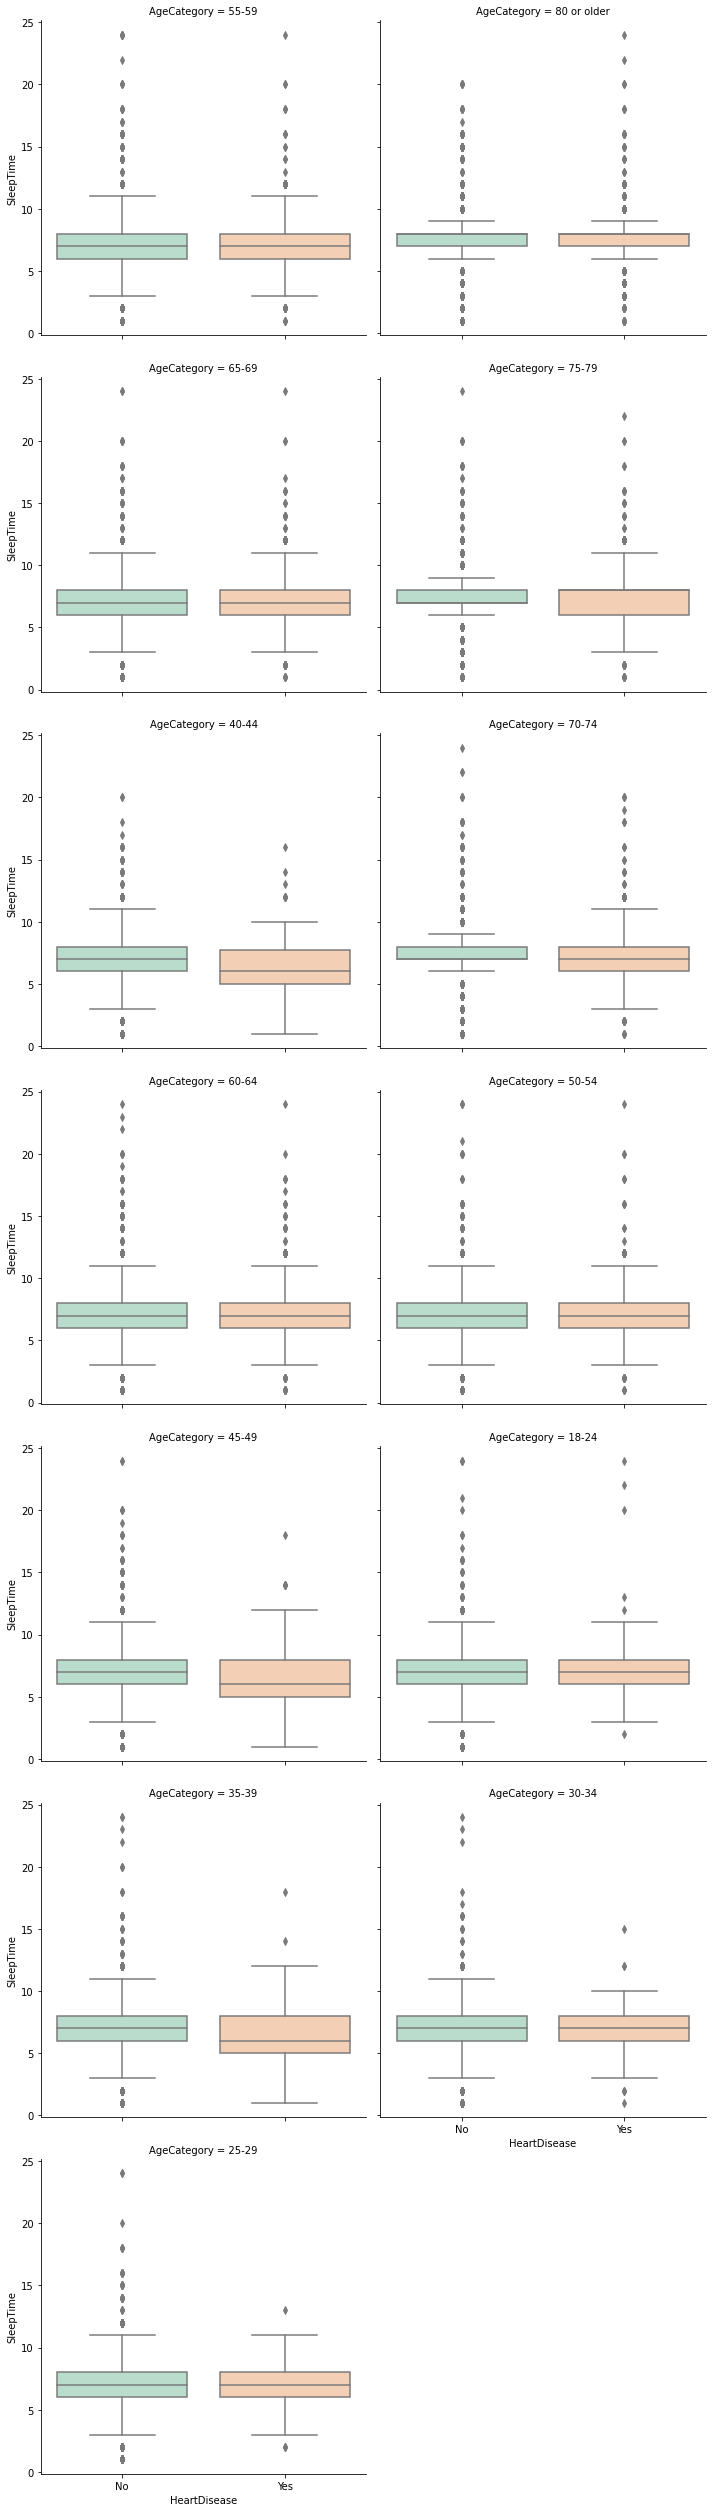

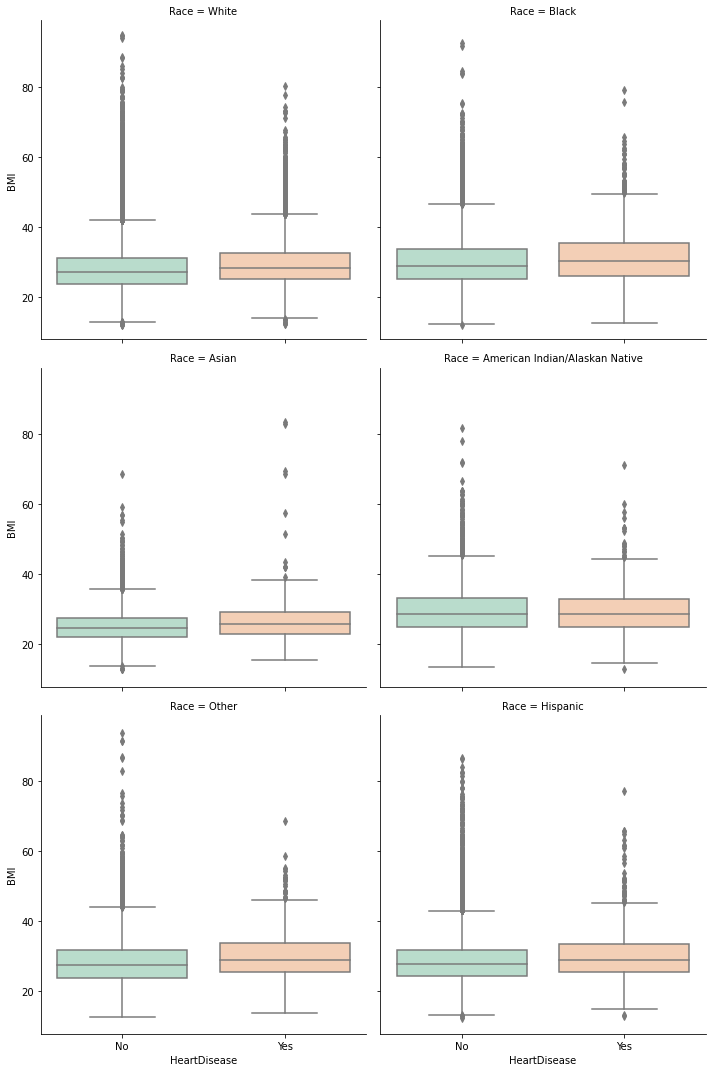

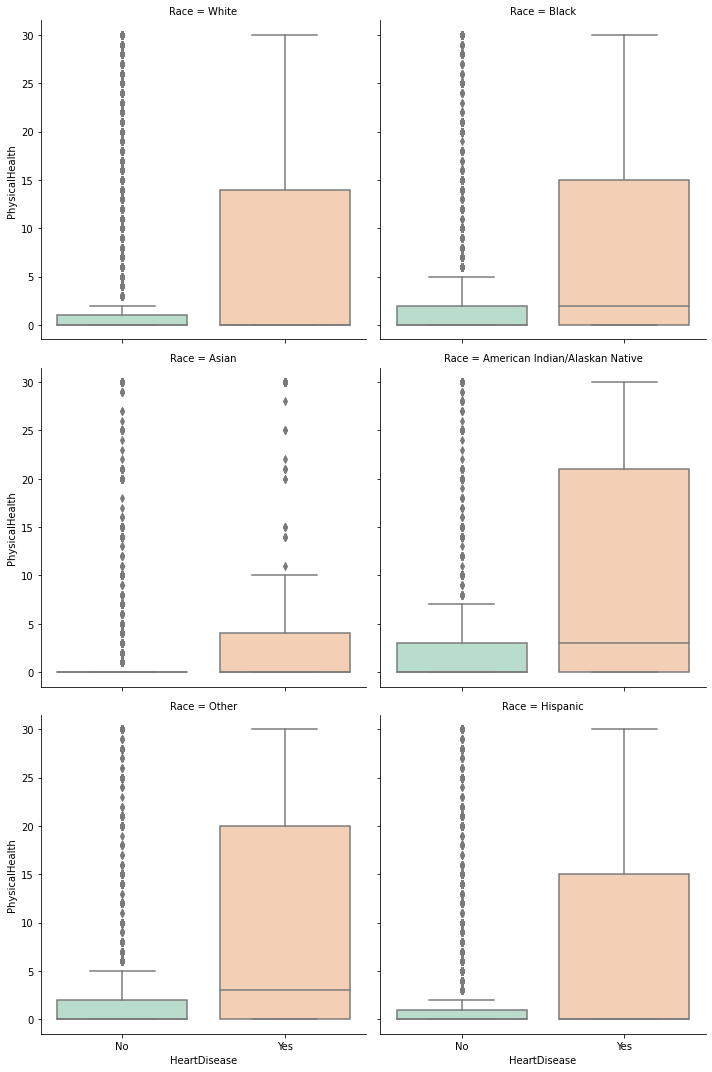

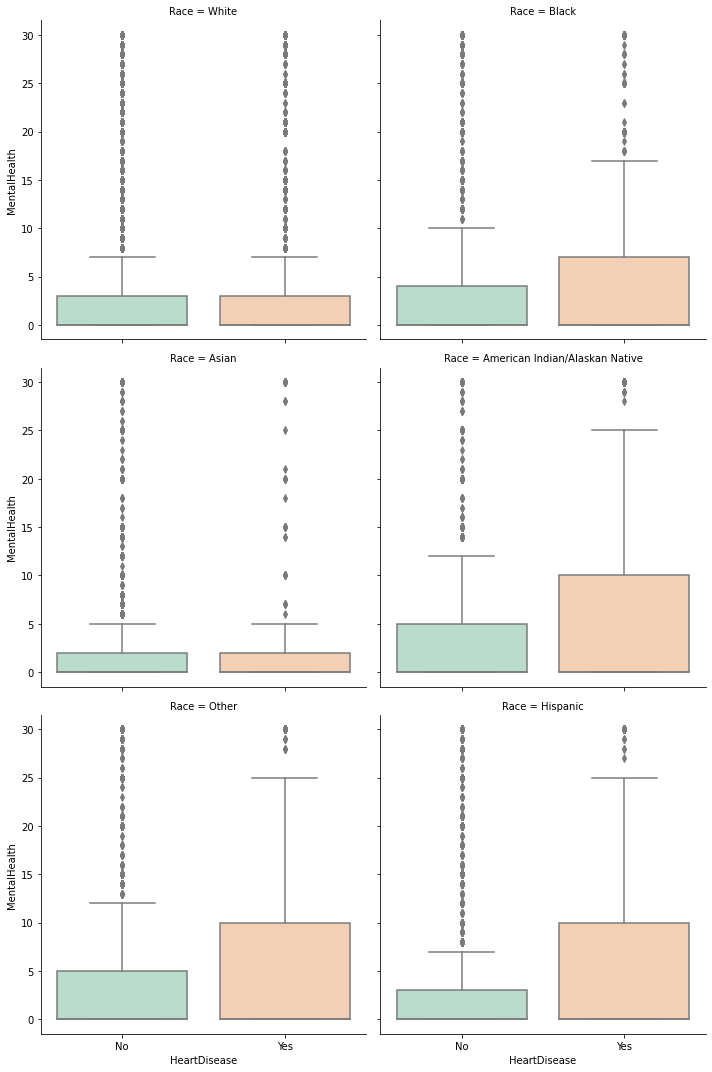

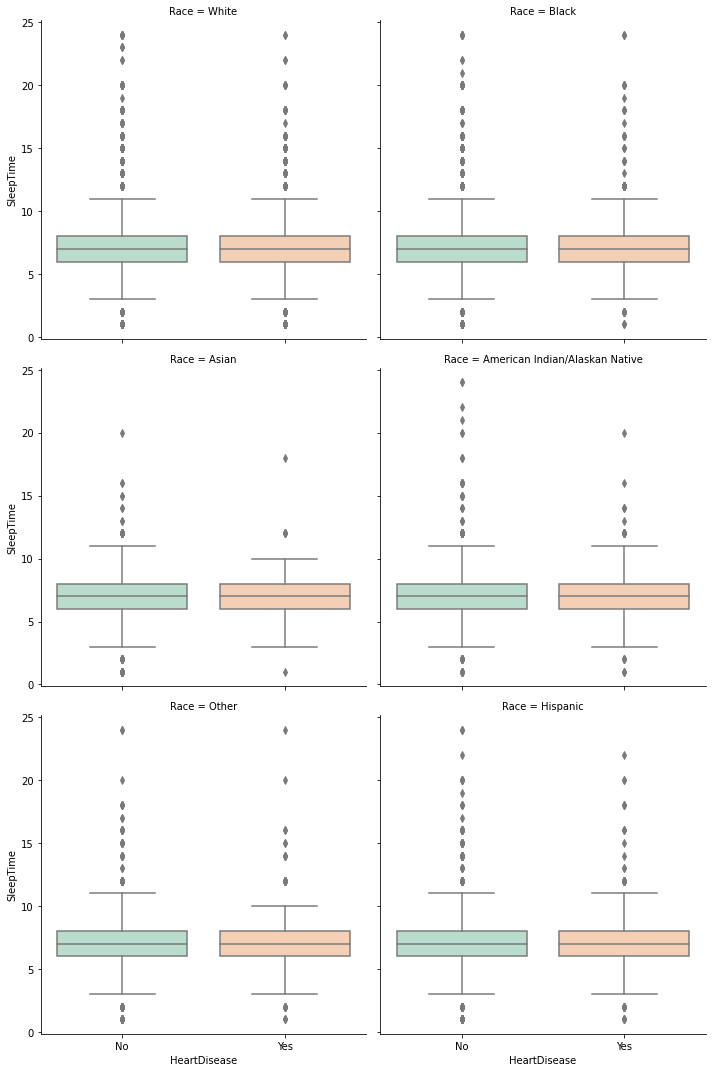

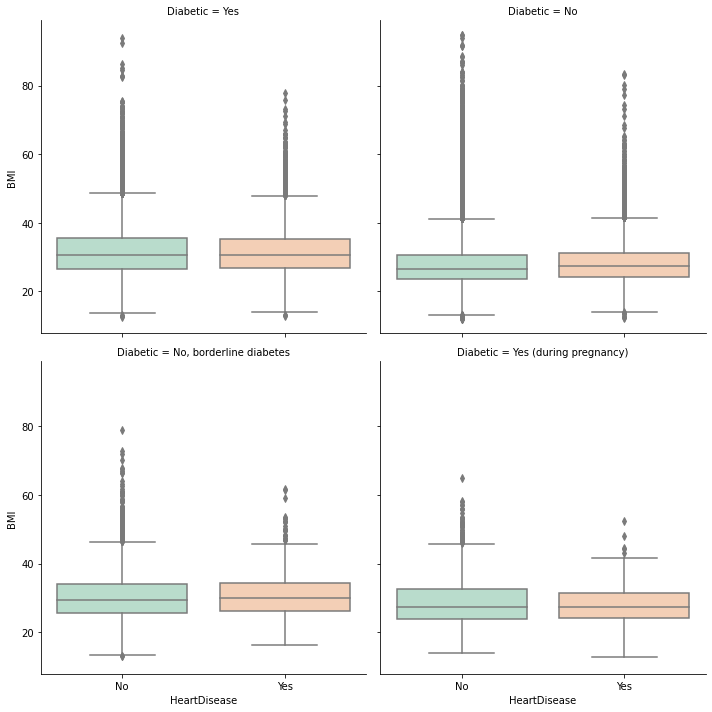

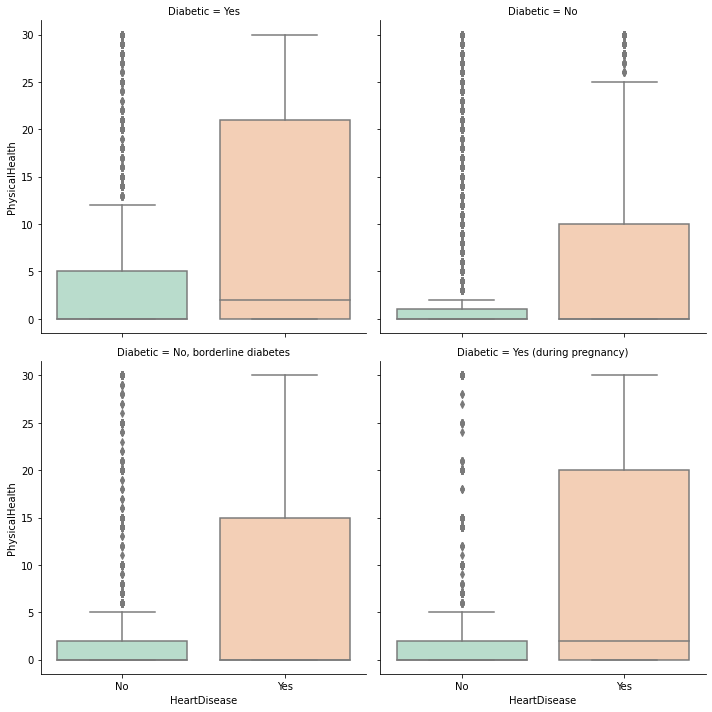

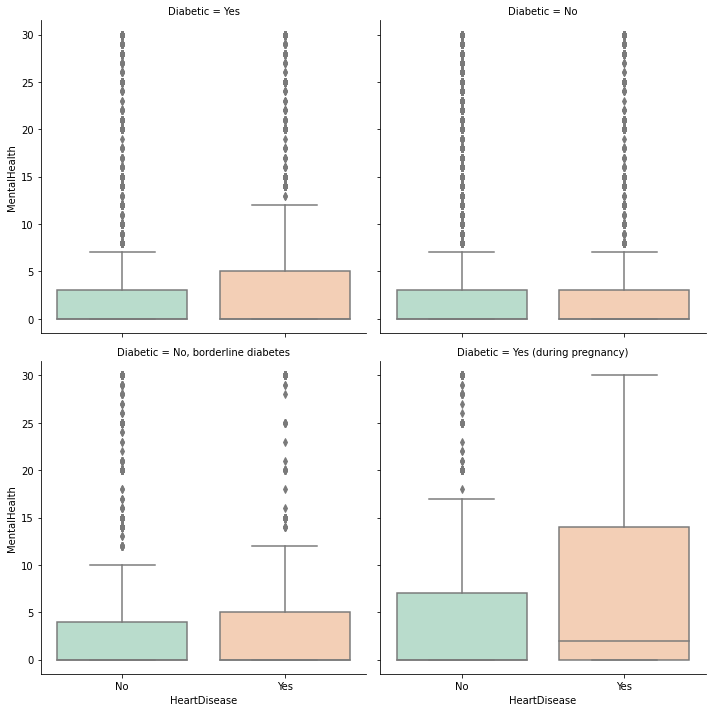

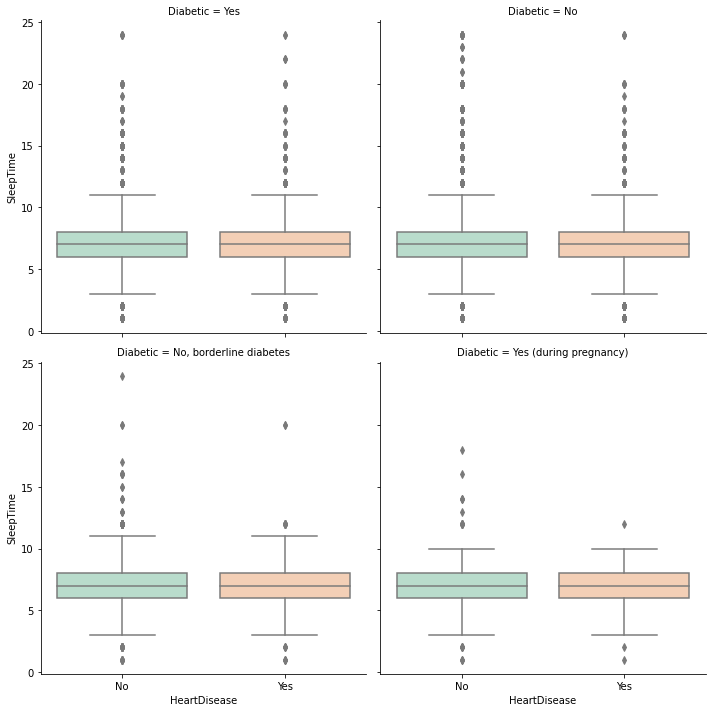

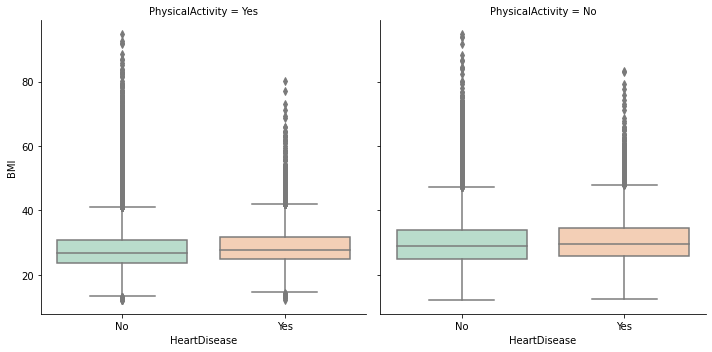

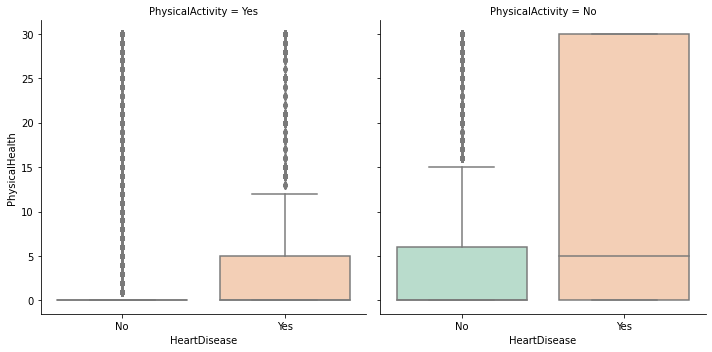

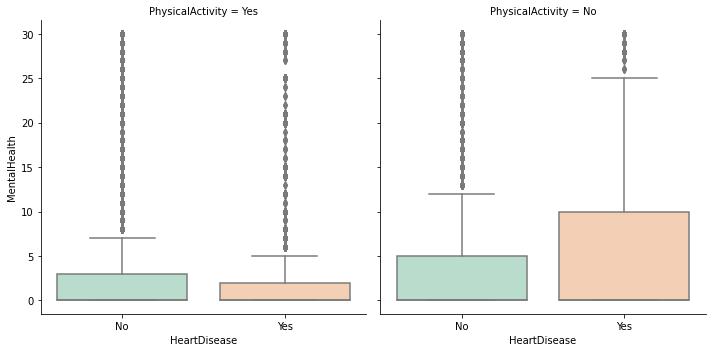

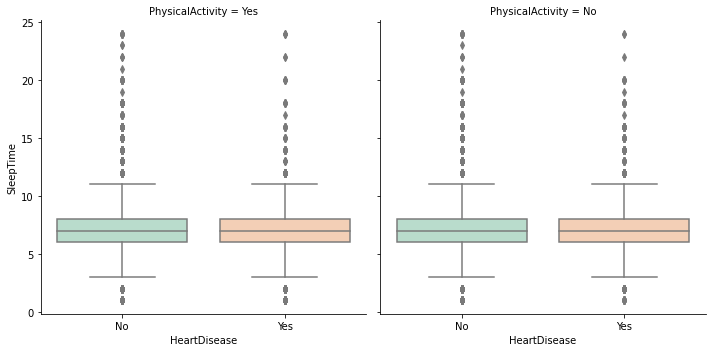

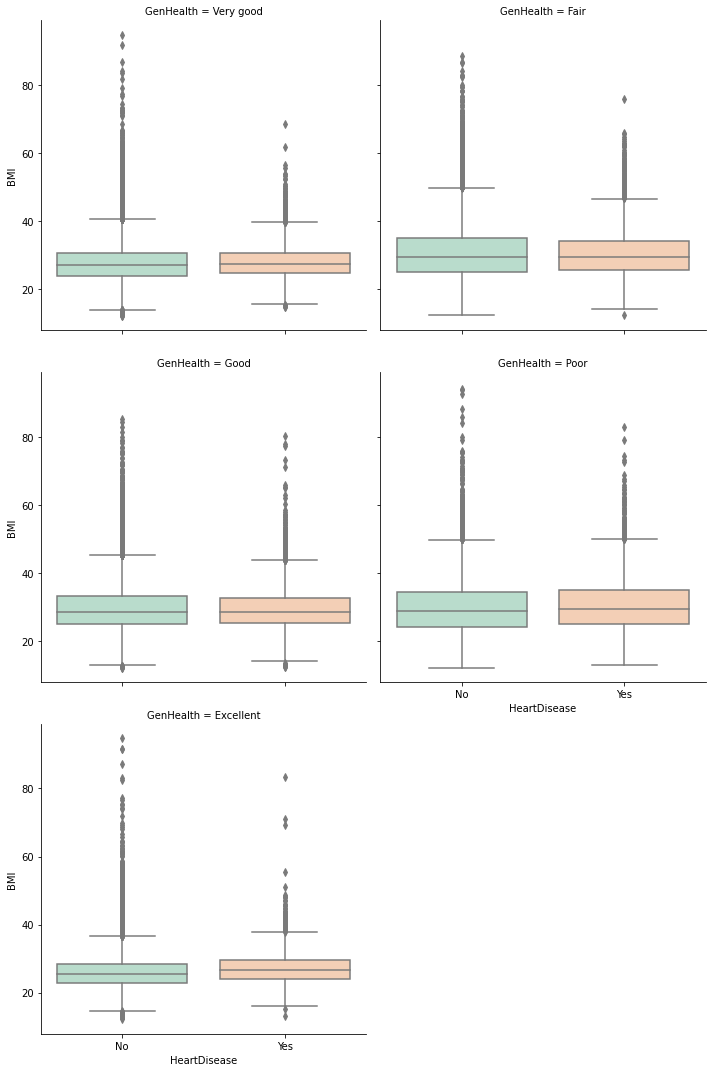

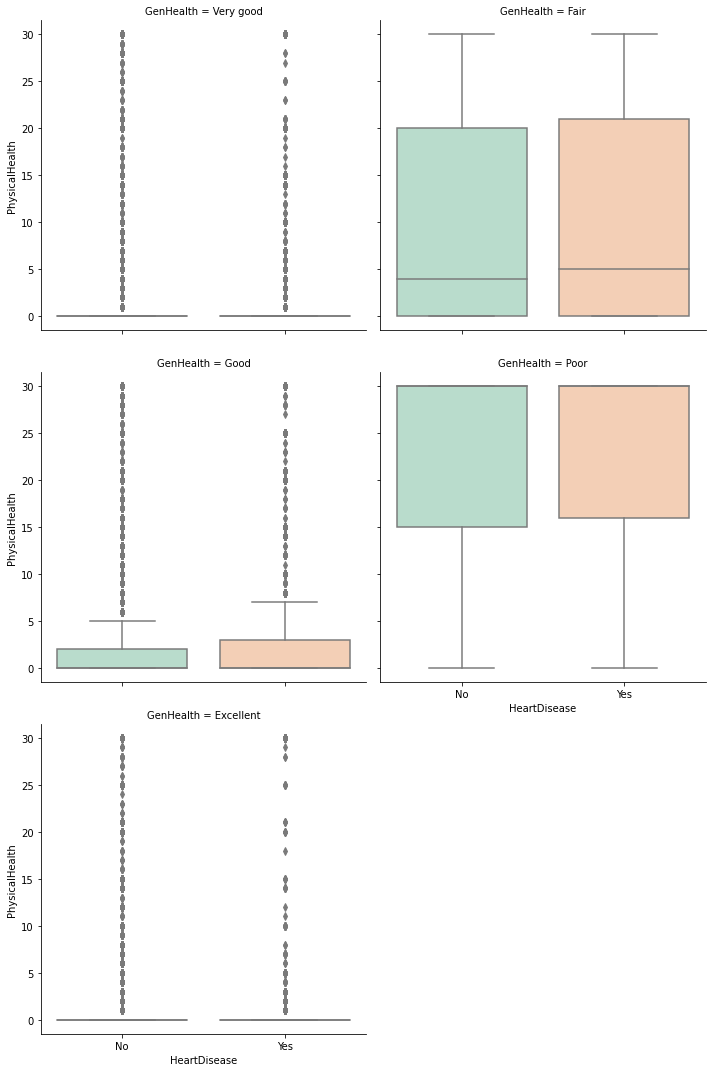

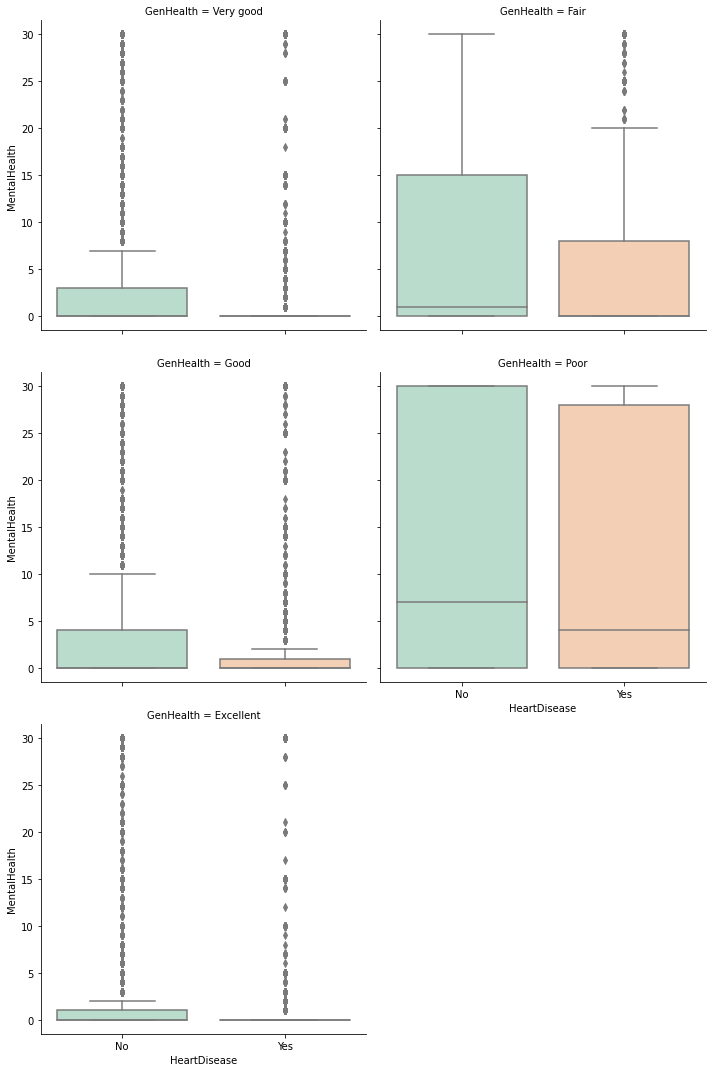

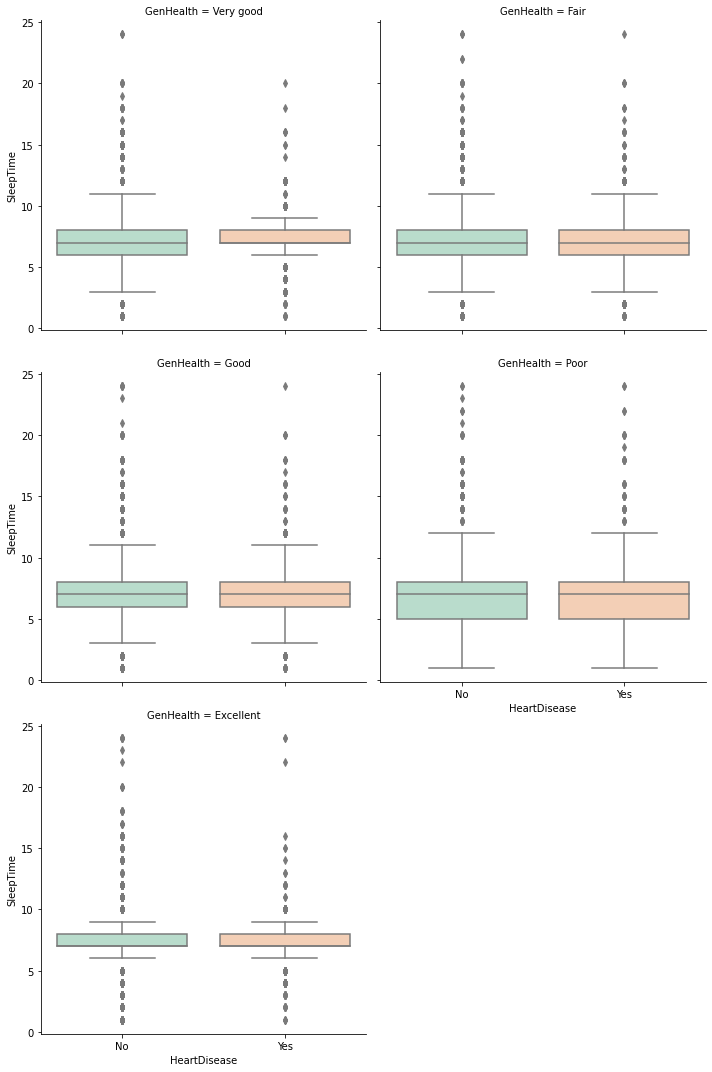

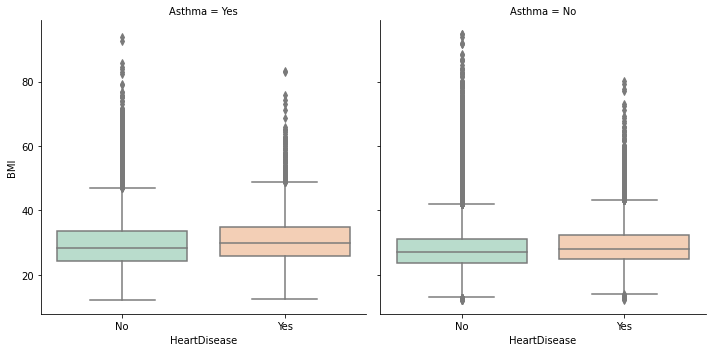

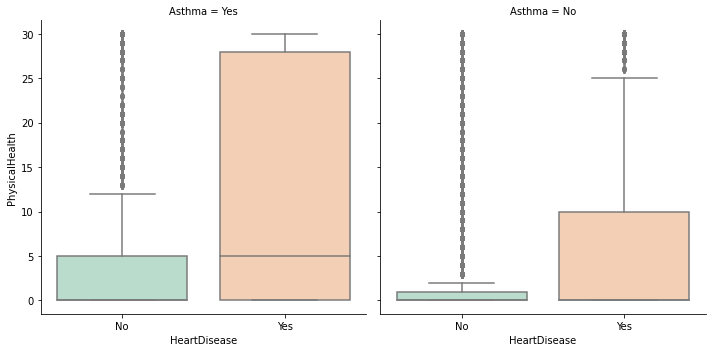

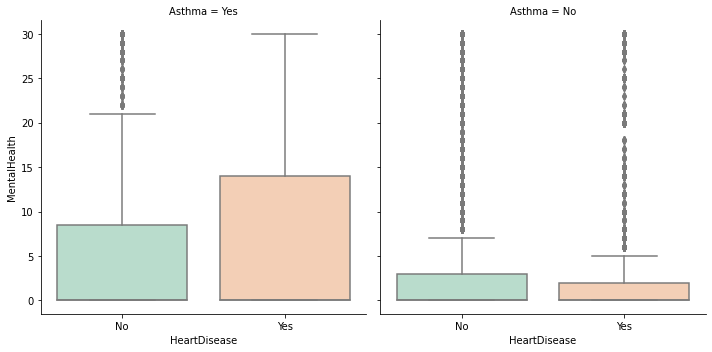

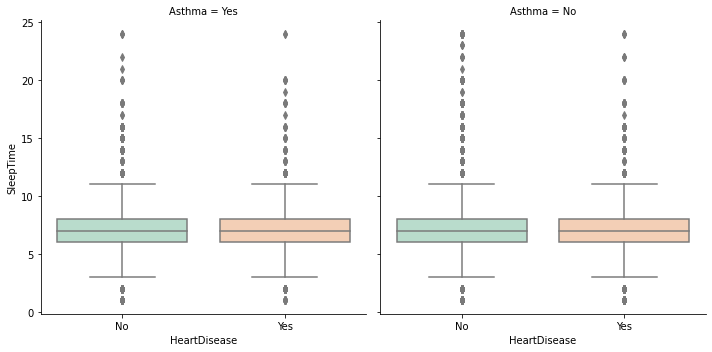

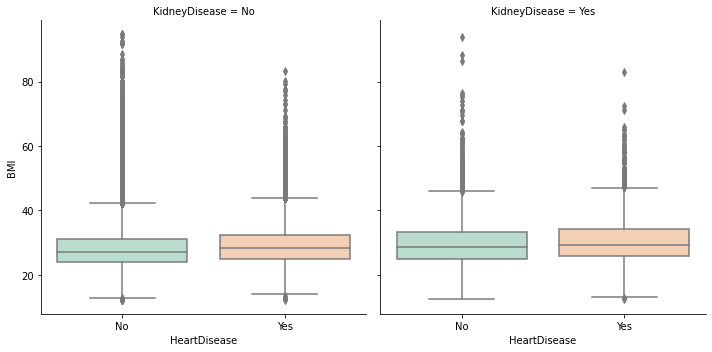

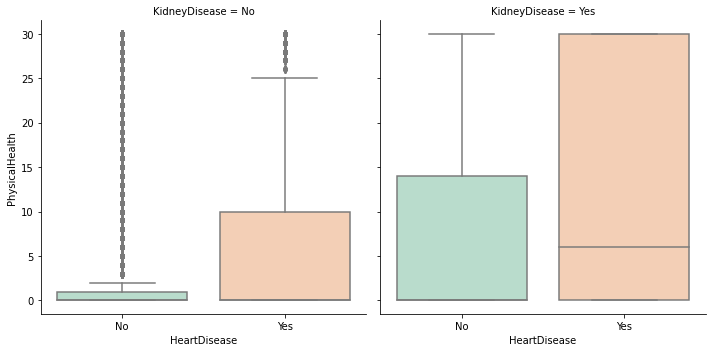

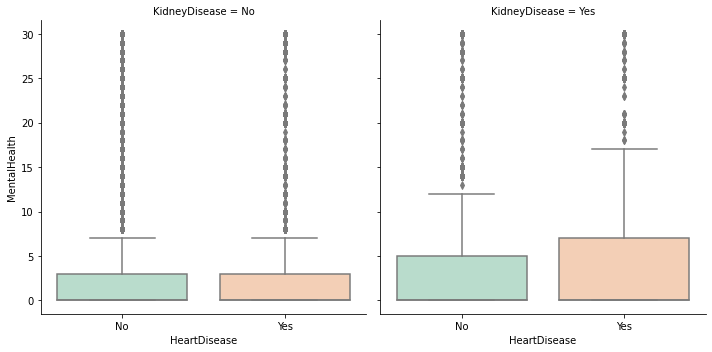

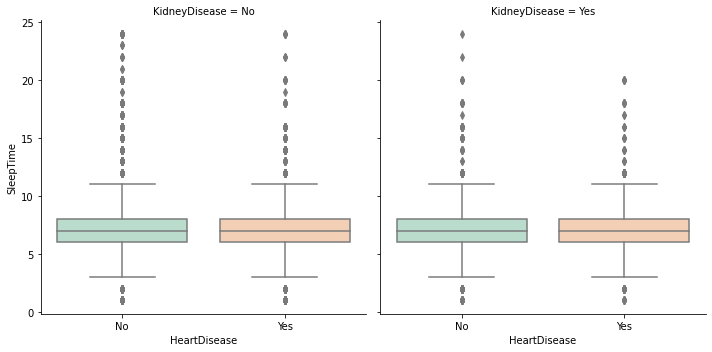

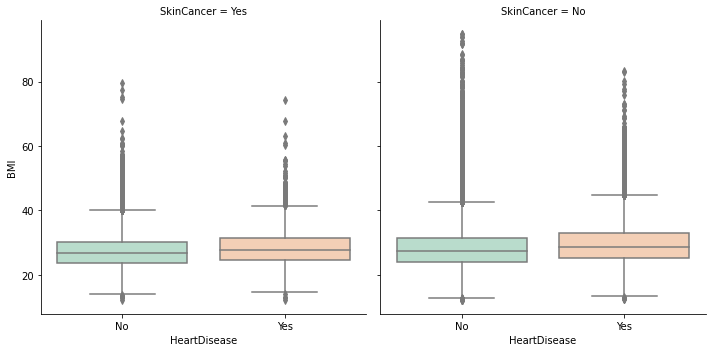

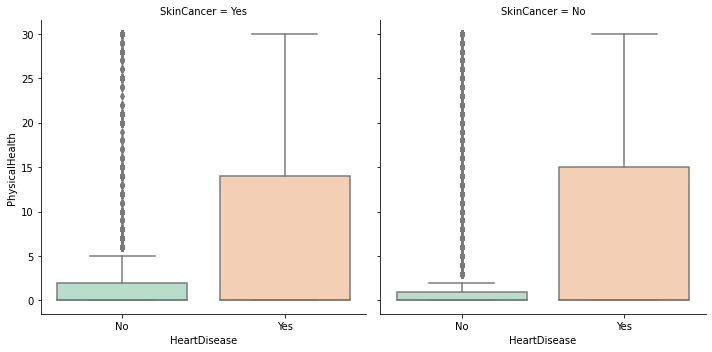

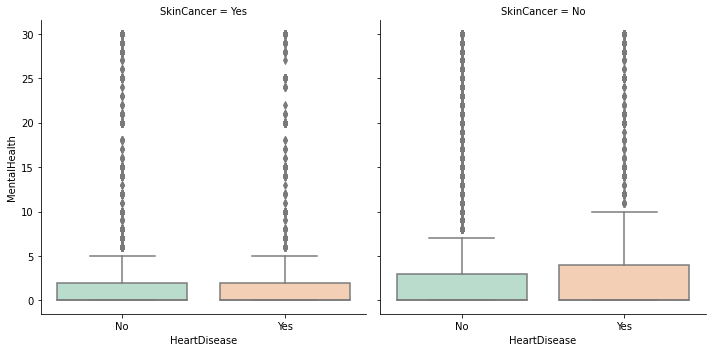

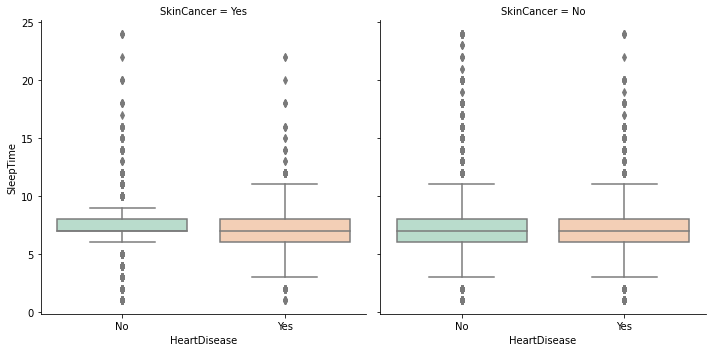

In [16]:
for i in range(1,len(list_cateog)):
    for j in range(len(list_non_categ)):
        #sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4
        g=sns.catplot(x=list_cateog[0], y=list_non_categ[j],col=list_cateog[i],col_wrap=2, data=df, kind="box",palette="Pastel2")


In [17]:
from scipy.stats import chi2_contingency

for i in range(1,len(list_cateog)):
    CrosstabResult=pd.crosstab(index=df[list_cateog[i]],columns=df[list_cateog[0]])
    ChiSqResult = chi2_contingency(CrosstabResult)
    print(list_cateog[i], ' - The P-Value of the ChiSq Test is:', ChiSqResult[1])


Smoking  - The P-Value of the ChiSq Test is: 0.0
AlcoholDrinking  - The P-Value of the ChiSq Test is: 1.892352227090306e-73
Stroke  - The P-Value of the ChiSq Test is: 0.0
DiffWalking  - The P-Value of the ChiSq Test is: 0.0
Sex  - The P-Value of the ChiSq Test is: 0.0
AgeCategory  - The P-Value of the ChiSq Test is: 0.0
Race  - The P-Value of the ChiSq Test is: 2.9886131565632597e-180
Diabetic  - The P-Value of the ChiSq Test is: 0.0
PhysicalActivity  - The P-Value of the ChiSq Test is: 0.0
GenHealth  - The P-Value of the ChiSq Test is: 0.0
Asthma  - The P-Value of the ChiSq Test is: 2.2386144306283177e-121
KidneyDisease  - The P-Value of the ChiSq Test is: 0.0
SkinCancer  - The P-Value of the ChiSq Test is: 0.0


In [18]:
new_df=df.copy(deep=False)
new_df.loc[:,'Target']= np.where(new_df['HeartDisease'] == "Yes" ,1,0)

new_df.drop(columns=['HeartDisease'], inplace=True)

In [19]:
new_df.loc[:,'Diabetic']= np.where(((new_df['Diabetic']  == 'No, borderline diabetes')|
                                       (new_df['Diabetic'] == 'No')), 'No', new_df['Diabetic'])

new_df.loc[:,'Race']= np.where(((new_df['Race']  == 'Asian')|
                                       (new_df['Race'] == 'American Indian/Alaskan Native')), 'Other', new_df['Race'])


In [20]:
new_df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Target
BMI,1.000000,0.109788,0.064131,-0.051822,0.051803
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,0.170721
MentalHealth,0.064131,0.287987,1.000000,-0.119717,0.028591
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,0.008327
Target,0.051803,0.170721,0.028591,0.008327,1.000000


In [21]:
new_df=pd.get_dummies(new_df, columns=list_cateog[1:])

y=new_df['Target']
X=new_df.drop(['Target'],axis=1)
X.rename(columns={'Diabetic_Yes (during pregnancy)':'Diabetic_Yes_during pregnancy','Diabetic_No, borderline diabetes':'Diabetic_No_borderline_diabetes'},inplace=True)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn import preprocessing
from catboost import CatBoostClassifier
import lightgbm as ltb
from imblearn.over_sampling import SMOTE
def regression_pipelines(X,y):
    # split into 70:30 ration
    sc = StandardScaler()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    lr1 = LogisticRegression(class_weight="balanced")
    lr1.fit(X_train, y_train)
    predictions = lr1.predict(X_test)
    print('Logistic Regression')
    # print classification report
    print(classification_report(y_test, predictions))

    #SMOTE Algorithm

    sm = SMOTE(random_state = 2)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    lr1 = LogisticRegression()
    lr1.fit(X_train_res, y_train_res.ravel())
    predictions = lr1.predict(X_test)
    print('Logistic Regression - SMOTE')
    # print classification report
    print(classification_report(y_test, predictions))


    # define pipeline
    over = SMOTE(sampling_strategy=0.1)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # transform the dataset
    X_train_pipeline, y_train_pipeline = pipeline.fit_resample(X_train, y_train)
    lr3 = LogisticRegression()
    lr3.fit(X_train_pipeline, y_train_pipeline)
    predictions = lr3.predict(X_test)
    print('Logistic Regression - Under/Over Sampling')
    # print classification report
    print(classification_report(y_test, predictions))



    clf = CatBoostClassifier(
        iterations=5,
        learning_rate=0.5,
        class_weights=(1, 10),
        l2_leaf_reg=10
        # loss_function='CrossEntropy'
    )
    clf.fit(X_train, y_train)
    clf.get_all_params()
    #clf.fit(X_train_pipeline, y_train_pipeline)
    print('Cat Boost Classifier  -Balanced Class Weight')
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,y_pred))


    lgb=ltb.LGBMClassifier(is_unbalance="True",learning_rate =0.1,n_estimators =200,reg_lambda=250,reg_alpha=10,min_split_gain=0.1,max_depth=40,num_leaves =40,min_child_weight =1,min_child_samples =50,subsample =0.8)
    lgb.fit(X_train, y_train)
    print('Light GBM Classifier  -Balanced Class Weight')
    y_pred = lgb.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    random_forest = RandomForestClassifier(n_estimators=300, max_depth=6,class_weight='balanced')
    random_forest.fit(X_train, y_train)
    print('Random Forest -Balanced Class Weight')
    y_pred = random_forest.predict(X_test)
    print(classification_report(y_test,y_pred))




    from sklearn.ensemble import VotingClassifier
    final_model = VotingClassifier(
        estimators=[('clf', clf), ('rf', random_forest), ('lgb', lgb), ('lr',lr1)], voting='hard')

    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)
    print('Voting Classifier - All Models')
    print(classification_report(y_test,y_pred))


    final_model = VotingClassifier(
    estimators=[('clf', clf), ('lgb', lgb), ('lr',lr1)], voting='hard')

    final_model.fit(X_train, y_train)
    y_pred = final_model.predict(X_test)
    print('Voting Classifier - Without Random Forest Models')
    print(classification_report(y_test,y_pred))

In [23]:
regression_pipelines(X,y)

Logistic Regression
              precision    recall  f1-score   support

           0       0.97      0.74      0.84     87730
           1       0.22      0.78      0.35      8209

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.59     95939
weighted avg       0.91      0.75      0.80     95939

Logistic Regression - SMOTE
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     87730
           1       0.22      0.78      0.35      8209

    accuracy                           0.75     95939
   macro avg       0.60      0.76      0.60     95939
weighted avg       0.91      0.75      0.80     95939

Logistic Regression - Under/Over Sampling
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     87730
           1       0.30      0.58      0.39      8209

    accuracy                           0.85     95939
   macro avg       0.63      0.72     